### Import Libraries

In [2]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Matplotlib Default Parameter

from matplotlib import rcParams
plt.style.use('fivethirtyeight')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']


# display all columns
pd.set_option('max_columns', 100)

### Read Data 

In [3]:
# Mounting to Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read Data

#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/online_shoppers_intention.csv')

path = '/content/drive/MyDrive/Rakamin/Final Project - Datskuyy/Final HW (HW0-Final)/online_shoppers_intention.csv'
df = pd.read_csv(path)

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# Check Number of Rows & Features

print('Total Rows :', df.shape[0])
print('Total Features :', df.shape[1])

Total Rows : 12330
Total Features : 18


### Exploratory Data Analysis

In [ ]:
# Create Data Info

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,Administrative,int64,0,0.0,27,"[0, 1, 2, 4]"
1,Administrative_Duration,float64,0,0.0,3335,"[0.0, 53.0, 64.6, 6.0]"
2,Informational,int64,0,0.0,17,"[0, 1, 2, 4]"
3,Informational_Duration,float64,0,0.0,1258,"[0.0, 120.0, 16.0, 94.0]"
4,ProductRelated,int64,0,0.0,311,"[1, 2, 10, 19]"
5,ProductRelated_Duration,float64,0,0.0,9551,"[0.0, 64.0, 2.666666667, 627.5]"
6,BounceRates,float64,0,0.0,1872,"[0.2, 0.0, 0.05, 0.02]"
7,ExitRates,float64,0,0.0,4777,"[0.2, 0.1, 0.14, 0.05]"
8,PageValues,float64,0,0.0,2704,"[0.0, 54.17976426, 19.44707913, 38.30849268]"
9,SpecialDay,float64,0,0.0,6,"[0.0, 0.4, 0.8, 1.0]"


- There are no missing value for each feature.

- Need to convert categorical features (`OperatingSystems`, `Browser`, `Region`, `TrafficType`, and `VisitorType`) into object data type.

- Need to change (imputation) `OperatingSystems`, `Browser`, `Region`, and `TrafficType` values into more understandable values (source : [here](https://gs.statcounter.com/)).

- Need to convert boolean features (`Weekend` and `Revenue`) into integer (binary) data type

- Need to change target feature name to prevent ambiguous meaning.

In [5]:
# Convert categorical features into object data type.

for i in ['OperatingSystems', 'Browser', 'Region', 'TrafficType']:
  df[i] = df[i].astype(str)

In [6]:
# Change Operating Systems, Browser, Region, and Traffic Type values into more understandable values

df.OperatingSystems = df.OperatingSystems.replace(['2', '1', '3', '4', '8', '6', '7', '5'],
                                                  ['Android 9 and Older Ver', 'Android 11', 'Win10', 'Android 10', 'Win9 and Older Ver', 'IOS', 'MacOS', 'Linux'])

df.Browser = df.Browser.replace(['2', '1', '4', '5', '6', '10', '8', '3', '13', '7', '12', '11', '9'],
                                ['Chrome Mobile', 'Chrome Desktop', 'Safari Mobile', 'Firefox Desktop', 'Samsung Internet', 'Microsoft Edge', 'UC Browser', 'Opera Mobile', 'Safari Desktop', 'Opera Desktop', 'Puffin', 'Firefox Mobile', 'Android Browser'])

df.Region = df.Region.replace(['1', '3', '4', '2', '6', '7', '9', '8', '5'],
                      ['Kota Tangerang Selatan', 'Depok', 'Jakarta', 'Bekasi', 'Kota Bekasi', 'Tangerang', 'Bandung', 'Surabaya', 'Semarang'])


df.TrafficType = df.TrafficType.replace(['2', '1', '3', '4', '13', '10', '6', '8', '5', '11', '20', '9', '7', '15', '19', '14', '18', '16', '12', '17'],
                                        ['Direct Visit', 'Google.com (Organic)', 'youtube.com', 'Google.com (Paid)','Duckduckgo.com',
                                         'Facebook.com (Refering Site)', 'm.facebook.com', 'i.facebook.com', 'Google.co.id', 'I.instagram.com',
                                         'r.search.yahoo.com', 'Yahoo Search', 'Linktr.ee', 'Anterinaja.id (Refering Site)','Google.co.id',
                                         'Iprice.co.id (Refering Site)','Detik.com (Refering Site)','Whatsapp.com (Refering Site)',
                                         'Pikiran-rakyat.com (Refering Site)', 'Jne.co.id (Refering Site)'])

In [7]:
# Change target feature name to prevent ambiguous meaning

df = df.rename(columns = {'Revenue' : 'Purchase'})

In [ ]:
# Create Data Info After Convert

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,Administrative,int64,0,0.0,27,"[0, 1, 2, 4]"
1,Administrative_Duration,float64,0,0.0,3335,"[0.0, 53.0, 64.6, 6.0]"
2,Informational,int64,0,0.0,17,"[0, 1, 2, 4]"
3,Informational_Duration,float64,0,0.0,1258,"[0.0, 120.0, 16.0, 94.0]"
4,ProductRelated,int64,0,0.0,311,"[1, 2, 10, 19]"
5,ProductRelated_Duration,float64,0,0.0,9551,"[0.0, 64.0, 2.666666667, 627.5]"
6,BounceRates,float64,0,0.0,1872,"[0.2, 0.0, 0.05, 0.02]"
7,ExitRates,float64,0,0.0,4777,"[0.2, 0.1, 0.14, 0.05]"
8,PageValues,float64,0,0.0,2704,"[0.0, 54.17976426, 19.44707913, 38.30849268]"
9,SpecialDay,float64,0,0.0,6,"[0.0, 0.4, 0.8, 1.0]"


#### Descriptive Statistics

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


- There are no invalid entries for each feature.
- `Administrative_Duration`, `Informational_Duration`, `ProductRelated`, `ProductRelated_Duration`, and `PageValues` features seem to have right skew distribution.
- Some features seem to have extreme outlier values.

In [ ]:
df.describe(exclude=[np.number]).T

,count,unique,top,freq
Month,12330,10,May,3364
OperatingSystems,12330,8,Android 9 and Older Ver,6601
Browser,12330,13,Chrome Mobile,7961
Region,12330,9,Kota Tangerang Selatan,4780
TrafficType,12330,19,Direct Visit,3913
VisitorType,12330,3,Returning_Visitor,10551
Weekend,12330,2,False,9462
Purchase,12330,2,False,10422


In [ ]:
# Grouping Features Based on Their Data Type

num = df.select_dtypes(include=[np.number], exclude=[np.bool]).columns
cat = df.select_dtypes(exclude=[np.number]).columns

#### Univariate Analysis

##### Numerical Features Analysis

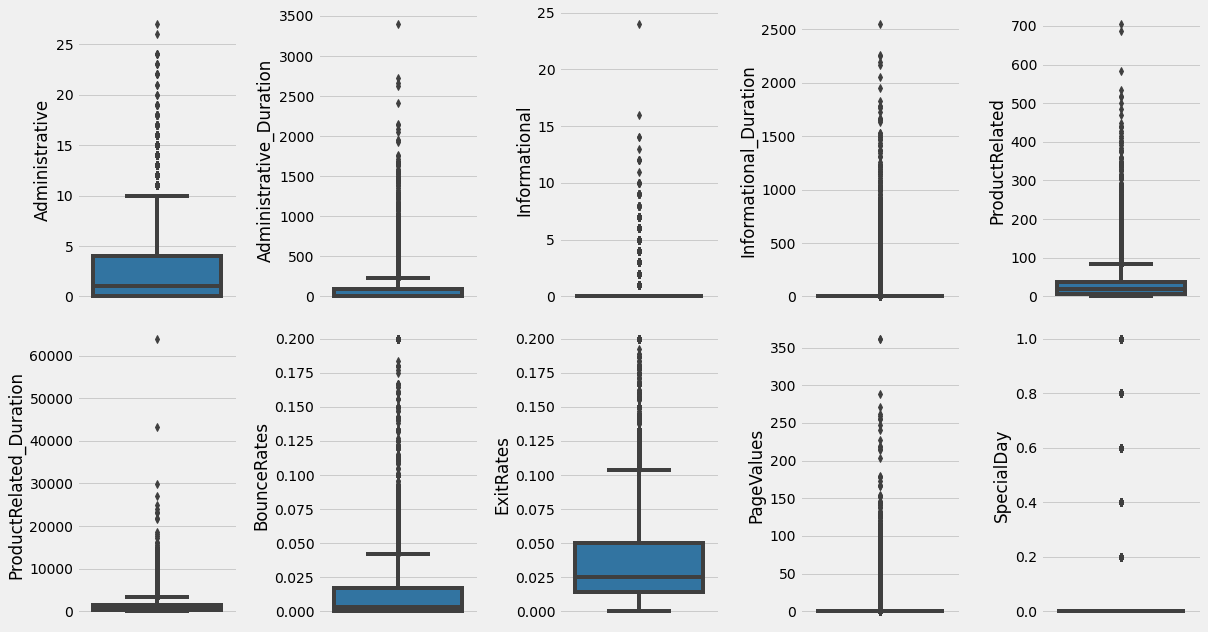

In [ ]:
# Create Boxplot for Each Numerical Feature

fig, axes = plt.subplots(2, 5, figsize=(17,9))
xy = [(0,0), (0,1), (0,2), (0,3), (0,4), (1,0), (1,1), (1,2), (1,3), (1,4)]

for i in range(len(num)):
  sns.boxplot(y=df[num[i]], ax=axes[xy[i]])
  plt.tight_layout()

- There are outlier values in `Administrative`, `Administrative_Duration`, `Informational`, `Informational_Duration`, `ProductRelated`, `ProductRelated_Duration`, `BounceRates`, `ExitRates`, and `PageValues` features.

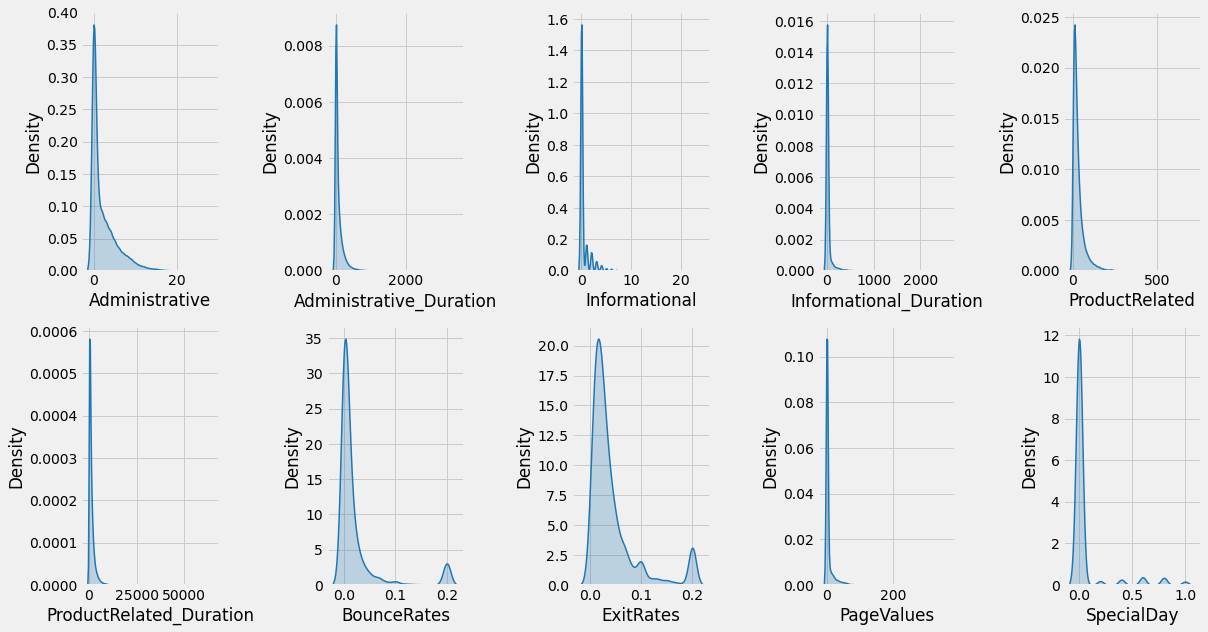

In [ ]:
# Create Distplot for Each Numerical Feature

plt.figure(figsize=(17,9))
for i in range(0, len(num)):
    plt.subplot(2, 5, i+1)
    sns.kdeplot(x=df[num[i]], linewidth=1.5, shade=True)
    plt.xlabel(num[i])
    plt.tight_layout()

- All of numeric features have right skew distribution.
- Many features have the central tendency at 0 value.

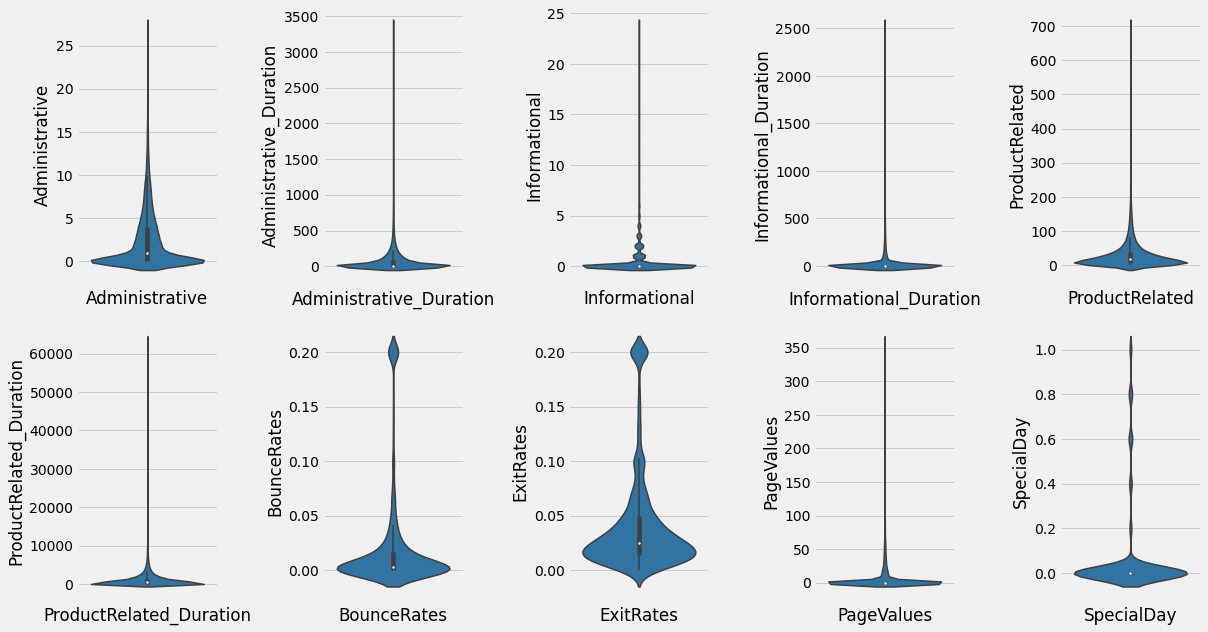

In [ ]:
# Create Violinplot for Each Numerical Feature

plt.figure(figsize=(17,9))
for i in range(0, len(num)):
    plt.subplot(2, 5, i+1)
    sns.violinplot(y=df[num[i]], linewidth=1.5)
    plt.xlabel(num[i])
    plt.tight_layout()

##### Categorical Features Analysis

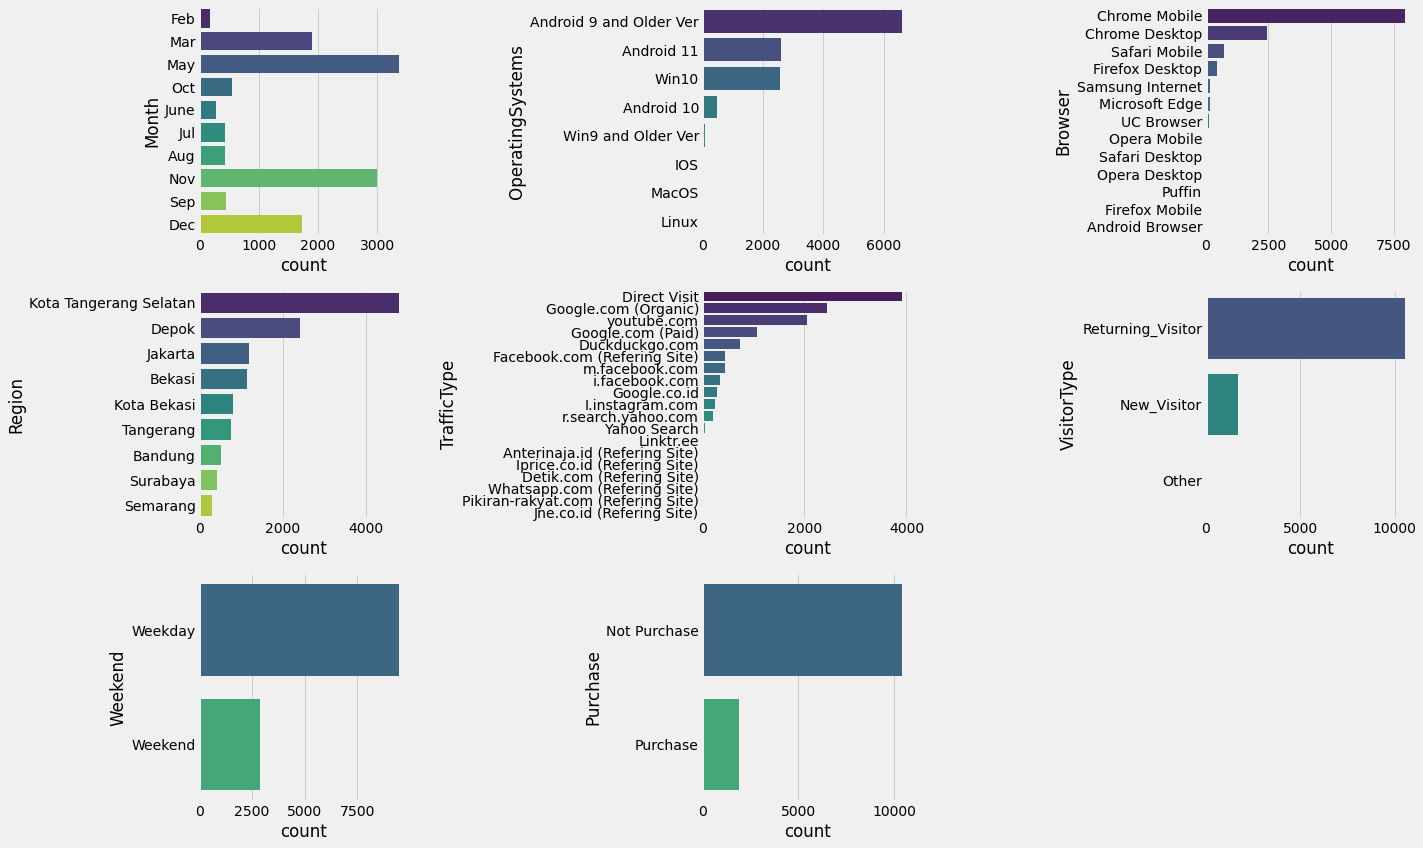

In [ ]:
# Create Countplot for Each Categorical Feature

fig, axes = plt.subplots(3, 3, figsize=(20,12))
xy = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1)]

for i in range(len(cat)):
  if i == 0:
    sns.countplot(y=df[cat[i]], palette='viridis',ax=axes[xy[i]])
  else:
    sns.countplot(y=df[cat[i]], palette='viridis', order= df[cat[i]].value_counts().index, ax=axes[xy[i]])
axes[2, 2].axis('off')
axes[2, 0].set_yticklabels(['Weekday', 'Weekend'])
axes[2, 1].set_yticklabels(['Not Purchase', 'Purchase'])
plt.tight_layout()

- `Month` column is dominated by these value: `Mar`, `May`, `Nov`, dan `Dec` and probably it will be converted by label encoding
- `OperatingSystems` column is dominated by these value: `Android 11`,`Android 9 and Older Ver`, and `Win 0` --> dominant value will be remain as before and the rest will be converted into `Others` Value
- `Browser` column is dominated by `Chrome Desktop`, `Chrome Mobile`, `Firefox Desktop`, and `Samsung Internet`  --> dominant value will be remain as before and the rest will be converted into `Others` Value 
- `Region` column is dominated by oleh `Tangerang Selatan`, `Jakarta`, `Bekasi` and `Tangerang` also `Bandung`,`Semarang`, and `Surabaya` will be converted into 1 value `Luar Jabodetabek`
- `TrafficType` is dominated by `Google.com`, `Direct Visit`, `Youtube.com`, etc --> Dominant value will be remain as before and the rest will be converted as `Others`
- `VisitorType` column `returning_visitor` dan `new visitor` --> `others` column will be converted into most dominant value (`returning_visitor`) and also we will use label (1,0) to Encode this column
-  `Weekend` and target column `Purchase` is boolean --> it will be converted into integer boolean 1,0

#### Bivariate Analysis

##### Numerical Features Analysis

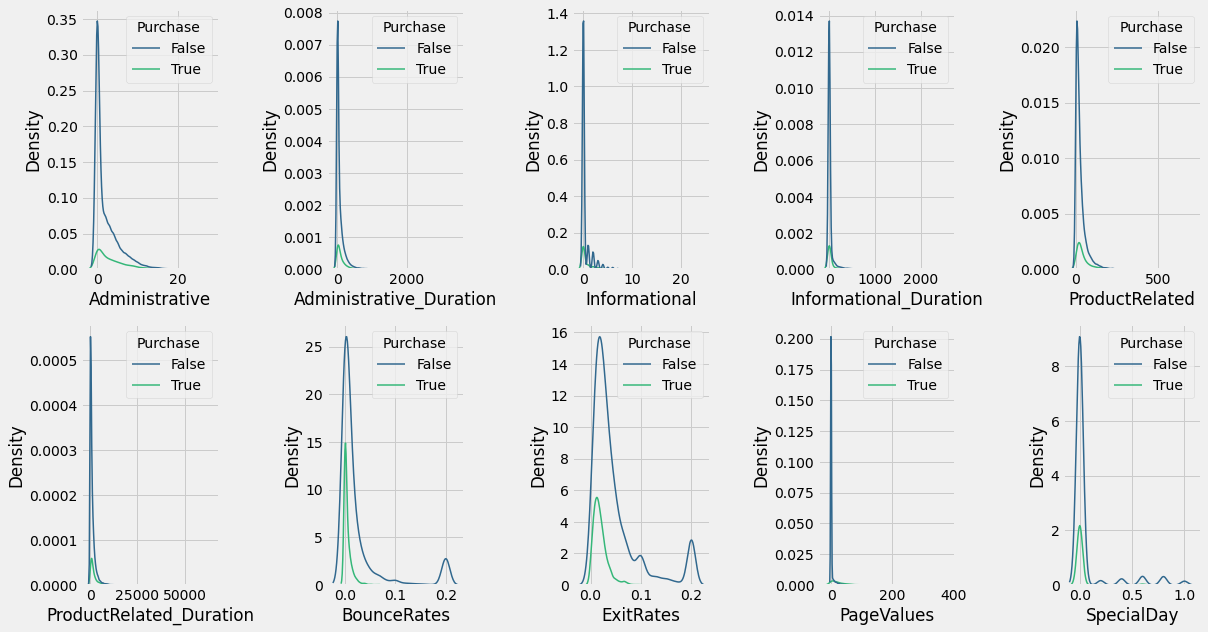

In [ ]:
# Create Distplot per Purchase for Each Numerical Feature

plt.figure(figsize=(17,9))
for i in range(0, len(num)):
    plt.subplot(2, 5, i+1)
    sns.kdeplot(x=df[num[i]], hue=df['Purchase'],palette='viridis', linewidth=1.5)
    plt.xlabel(num[i])
    plt.tight_layout()

##### Categorical Features Analysis

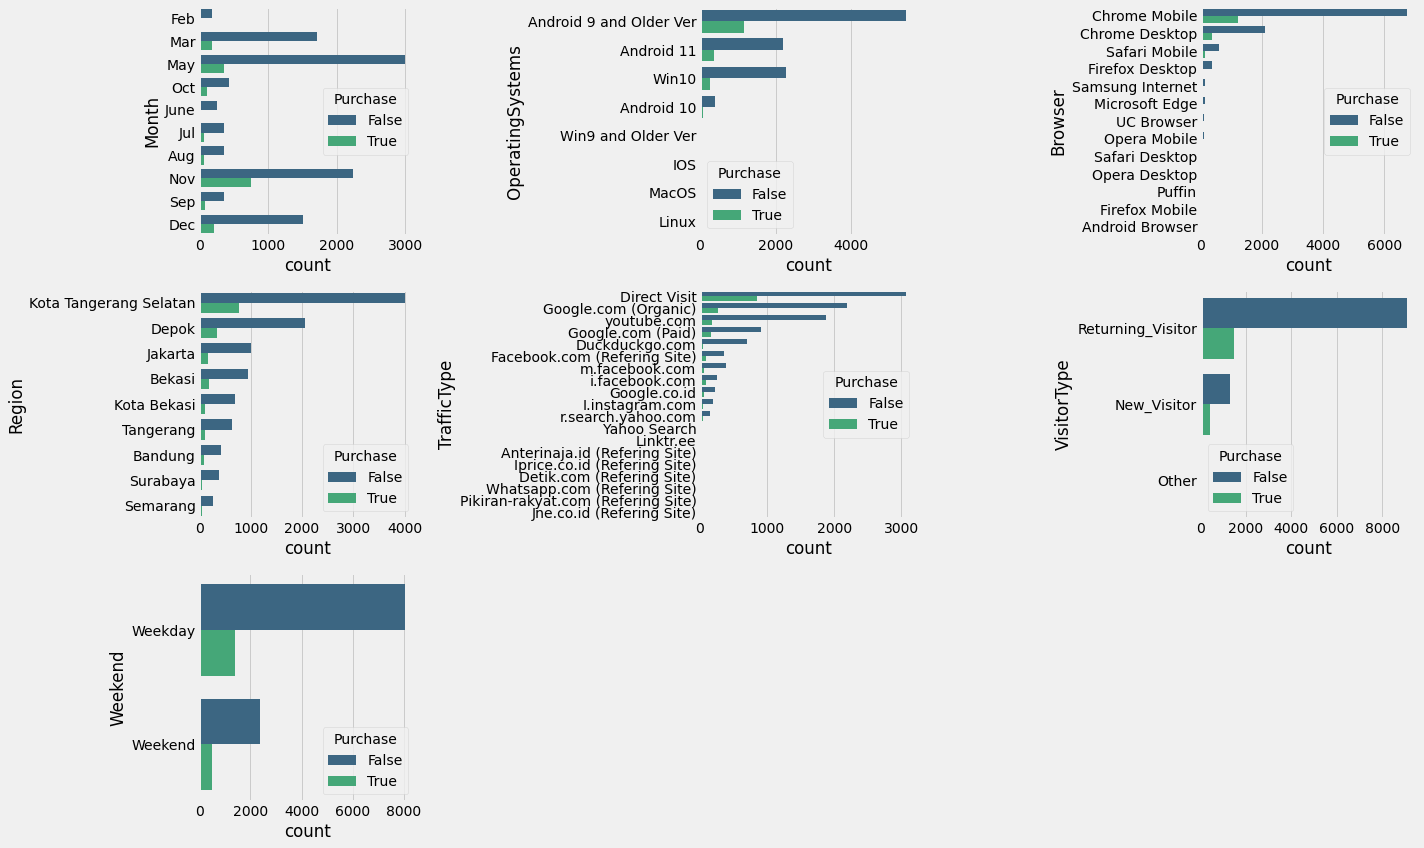

In [ ]:
# Create Countplot per Purchase for Each Categorical Feature

fig, axes = plt.subplots(3, 3, figsize=(20,12))
xy = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1)]

for i in range(len(cat)-1):
  if i == 0:
    sns.countplot(y=df[cat[i]], hue=df.Purchase, palette='viridis', ax=axes[xy[i]])
    plt.tight_layout()
  else:
    sns.countplot(y=df[cat[i]], hue=df.Purchase, palette='viridis', order= df[cat[i]].value_counts().index, ax=axes[xy[i]])
    plt.tight_layout()
axes[2, 1].axis('off')
axes[2, 2].axis('off')
axes[2, 0].set_yticklabels(['Weekday', 'Weekend'])
plt.tight_layout()

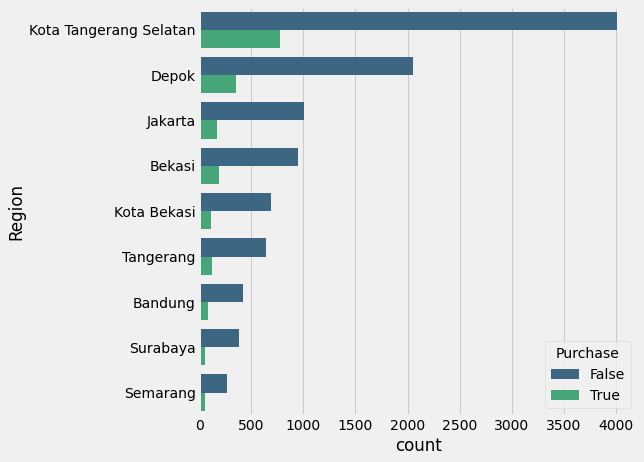

In [20]:
plt.figure(figsize=(7,7))
sns.countplot(y=df['Region'], hue=df['Purchase'], palette='viridis', order=df['Region'].value_counts().index)

In [26]:
df[(df['Region'] == 'Jakarta') & (df['Purchase']==False)].shape

(1007, 18)

- The most visited month in this year are `Mar`, `May`, `Nov`, and `Dec`
- In `Nov` and `May` are the highest month for visitors who tend to purchase
- `Android 11` and `Android 0 and older Ver` are 2 most highest user in this company
- `Chrome mobile` and `Chrome Desktop` are 2 most browser used by users and also bring the most converted visitors
- `Kota Tangerang Selatan` is highest region where the user came from and also it has the highest converted visitor
- `Google.com`, `Direct Visit`, and `Youtube.com` are top 3 the highest traffic 
- `Returning_Visitor` is dominant value and bring most of converted visitor
- `Weekday` is dominant value and it brings more converted visitor than `Weekend`

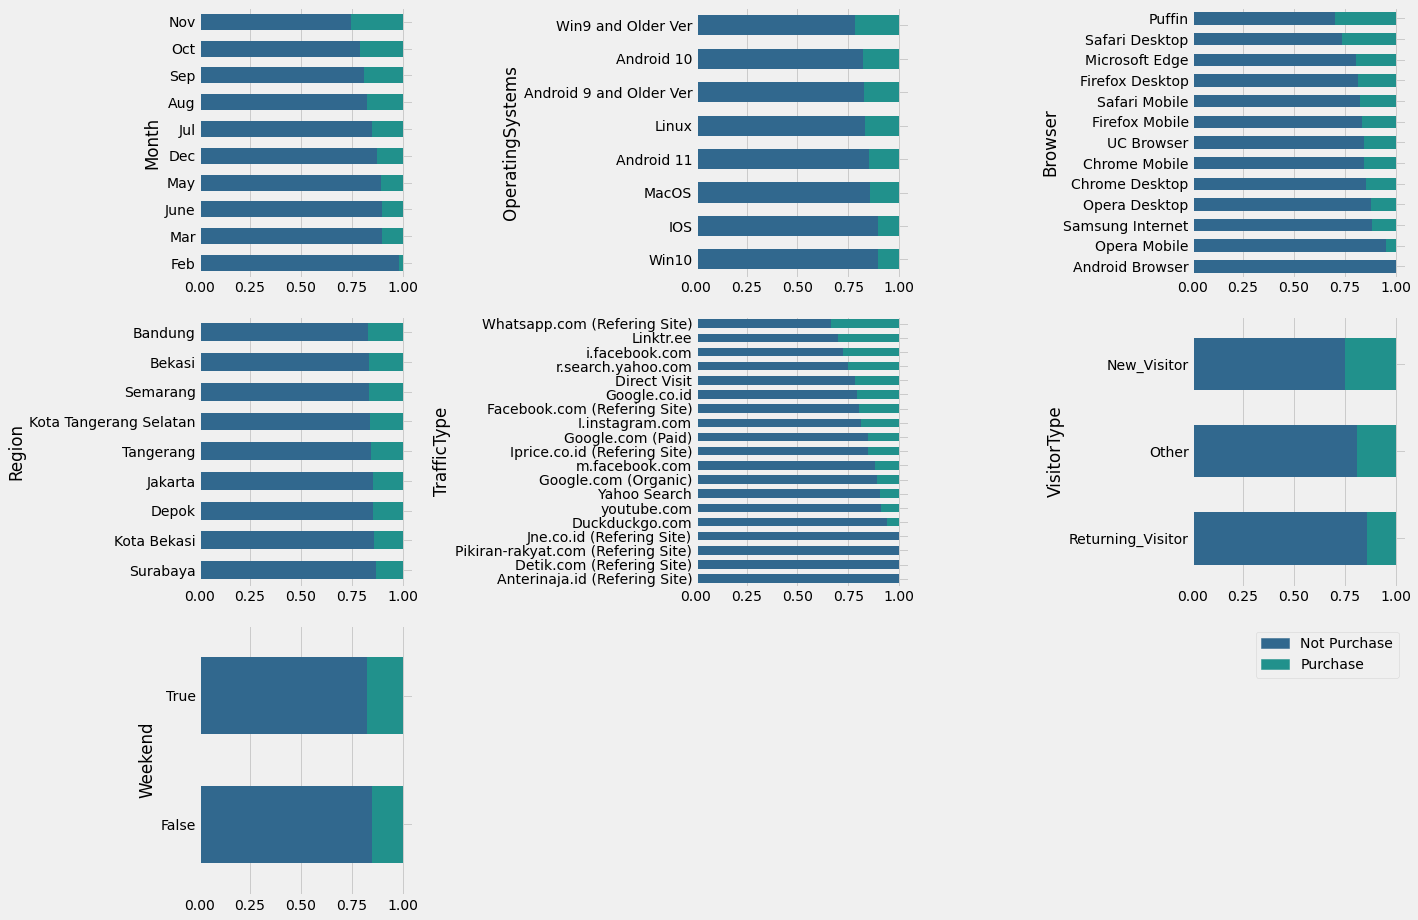

In [ ]:
# Create 100% Stacked Bar Chart per Purchase for Each Categorical Feature

fig, ax = plt.subplots(3,3, figsize=(20,13))
xy = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2)]
for i in range(len(cat)-1):
    sbc = pd.crosstab(df[cat[i]], df.Purchase)
    sbc = sbc.div(sbc.sum(axis=1).astype(float), axis=0).sort_values(1)
    sbc.plot(kind='barh', stacked=True, color = ['#31688e', '#21918c'], width = 0.6, ax = ax[xy[i]])
    ax[xy[i]].legend().remove()
    plt.tight_layout()

ax[2, 1].axis('off')
ax[2, 2].axis('off')
no_purchase = mlp.patches.Patch(color='#31688e', label='Not Purchase')
purchase = mlp.patches.Patch(color='#21918c', label='Purchase')
plt.legend(handles=[no_purchase, purchase], fontsize=14)

- 2nd semester months of the year tend to bring a lot of visitors who convert (`Jul` until `Dec`) 
- Almost every `OperatingSystems` brings 20% converted visitors
- Every region bring about 15%-20% converted visitors
- `I.price.com` brings most of converted visitor

##### Category vs Numeric Feature Analysiss

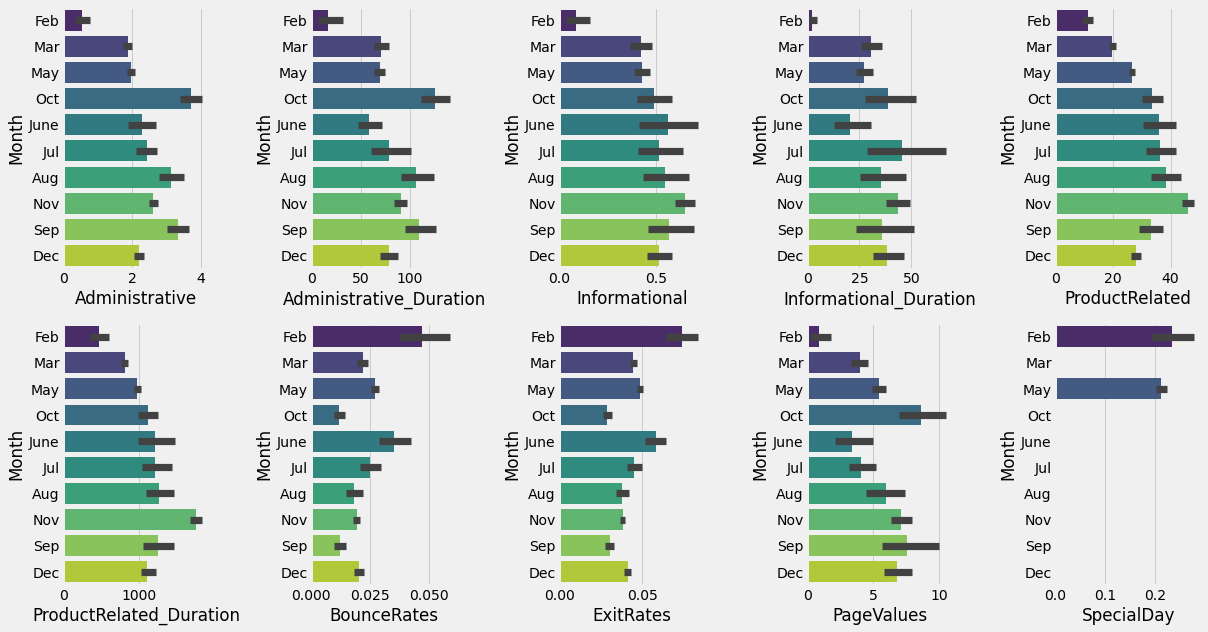

In [ ]:
# Create Barplot per Month for Each Numerical Feature

plt.figure(figsize=(17,9))
for i in range(0, len(num)):
    plt.subplot(2, 5, i+1)
    sns.barplot(x=df[num[i]], y=df['Month'],palette='viridis')
    plt.xlabel(num[i])
    plt.tight_layout()

- When average `ExitRates` and average `BounceRates` increase, average `PageValues` highly tend to decrease, vice versa
- `SpecialDay` Will be dropped because it doesn't represent all months 
- The most highest `ExitRates` and `BouncesRates` is `Feb`, when all numeric column (besides 2 above) are in the lowest point

#### MultiVariate Analysis

##### Correlation Heatmap

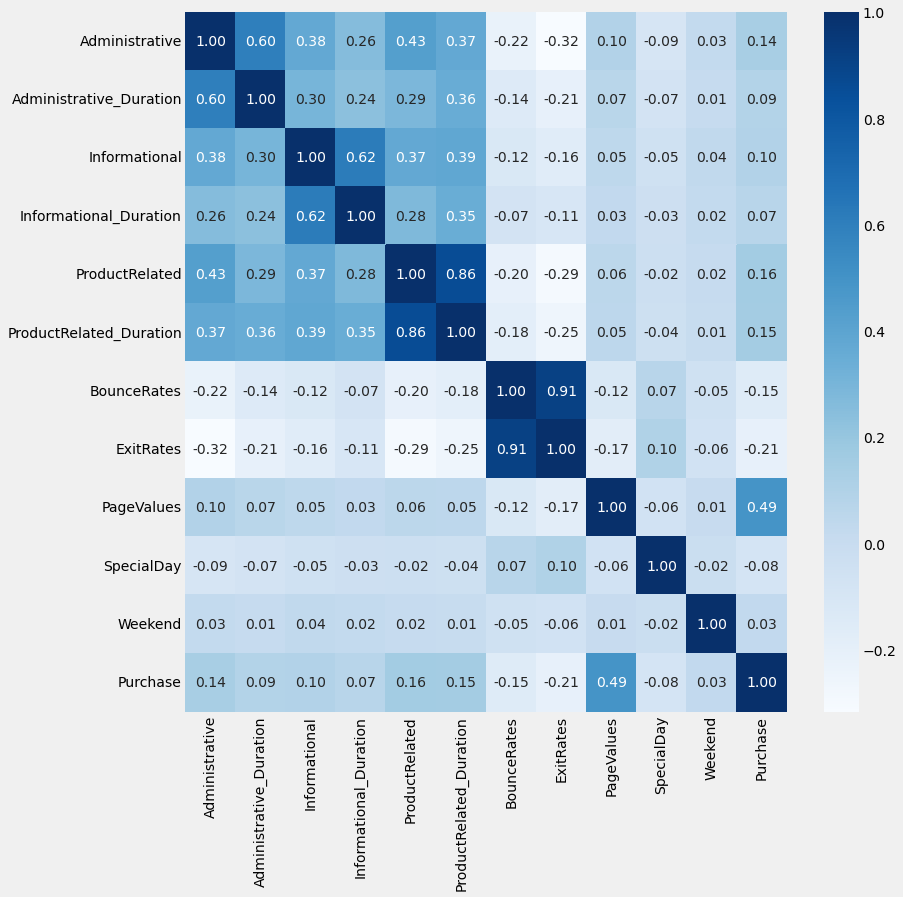

In [ ]:
# Create Heatmap Correlation Chart for Each Numerical Features

plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

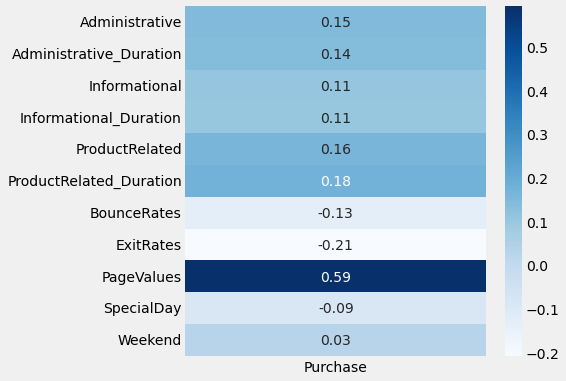

In [ ]:
# Create Heatmap Correlation Chart for Each Numerical to Target Features

plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(method = 'kendall')[df.corr(method = 'kendall').index != 'Purchase'][['Purchase']], cmap='Blues', annot=True, fmt='.2f')

- `PageValues` column is slightly high positive corelated to target feature `Purchase`
- `Administrative`, `ProductRelated` dan `ProductRelated_Duration` columns have weak corelation with target feature `Purchase`
- `BouncesRates` and `ExitRates` have weak correlation with target feature `Purchase`
- `ExitRates` and `BouncesRates` are positively corelated each other 
- `ProductRelated` and `ProductRelated_Duration` have positive strong correlation each other 

##### Pair Plot

<Figure size 1080x1080 with 0 Axes>

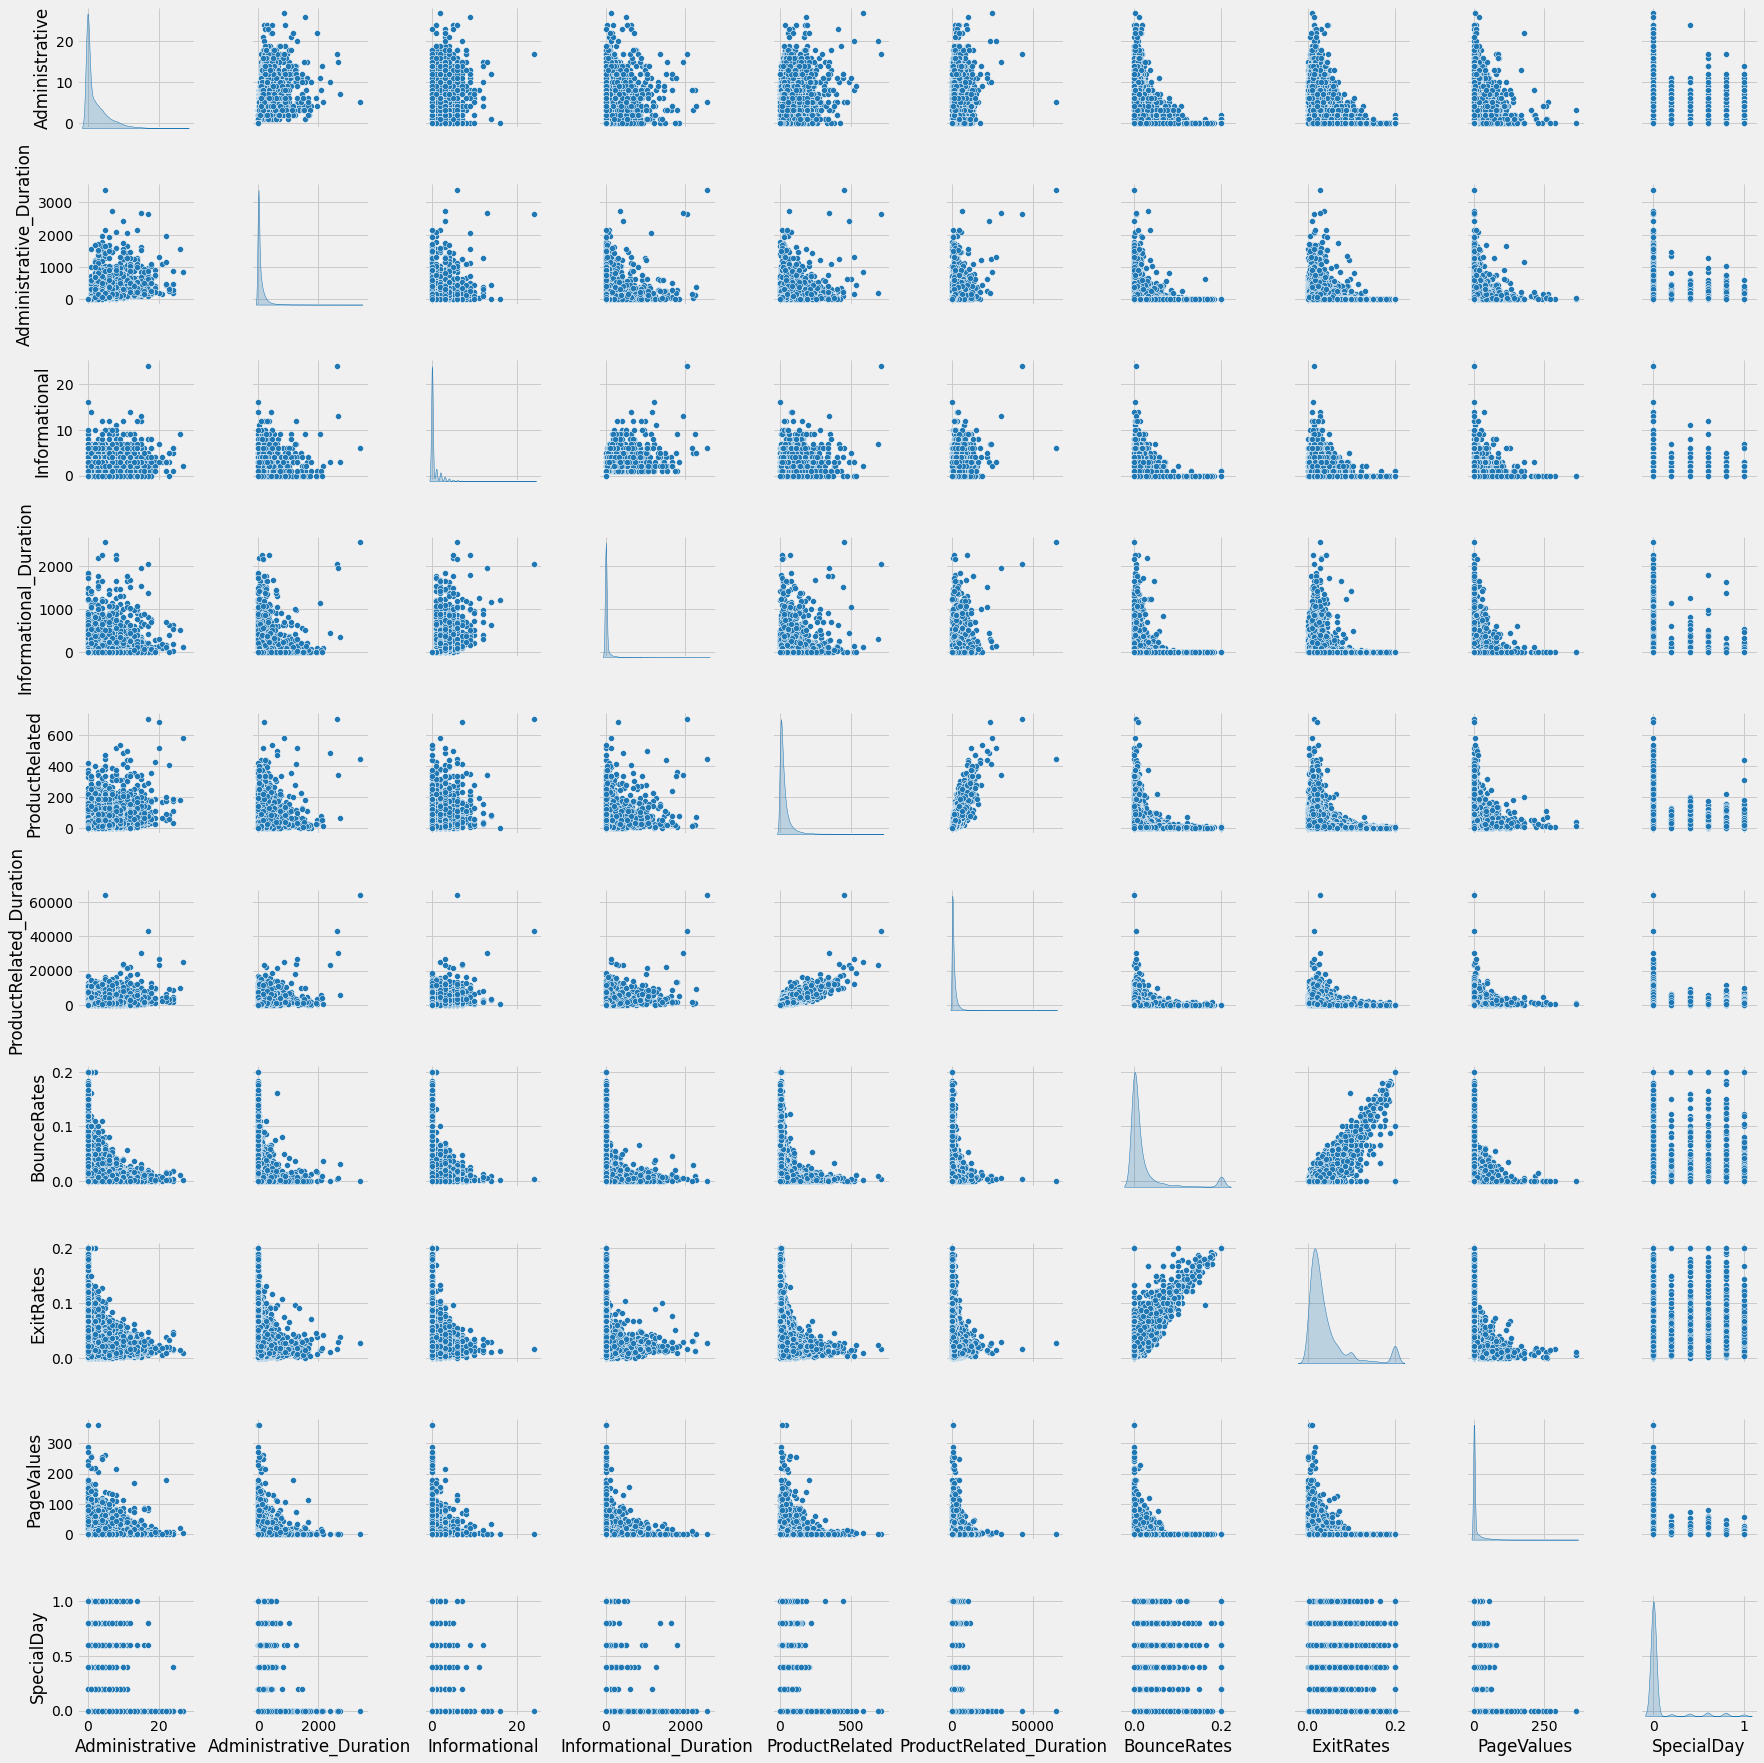

In [ ]:
# create pairplot
plt.figure(figsize=(15, 15))
sns.pairplot(df[num], diag_kind='kde')

Recomendation for Next Stage <br>
- For some category features (`OperatingSystems`, `Browser`, `Region`, `TrafficType`, `VisitorType`) will be converted using One Hot Encoder, but before that, we only use Dominant Values, for Subordinate Values will be converted as `Others`.
- `SpecialDays` probably will be dropped, because it doesn't represent all month values (its only provide information for 2 months).
- Some numeric features have outlier, we need to handle it in the next stage.
- Most of numeric features are right skewed distribution.
- Some of features are highly corelated each other, we need to handle it later (but it depends on what algorithm will be used).
- `Weekend`, `VisitorType`, and `Purchase` will be converted into binary type.

### Pre Processing

#### Handling Duplicate

In [ ]:
# Check Duplicated Data

print(f'Number of duplicated data = {df.duplicated().sum()}')

Number of duplicated data = 125


In [ ]:
# Drop Duplicated Data

df = df.drop_duplicates()
print(f'Number of duplicated data = {df.duplicated().sum()}')

Number of duplicated data = 0


#### Drop Unused Feature

In [ ]:
# Drop Special Day and PageValues Feature 

df = df.drop(['SpecialDay', 'PageValues'], axis=1)

#### Values Feature Grouping

In [ ]:
df[cat].head()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
0,Feb,Android 11,Chrome Desktop,Kota Tangerang Selatan,Google.com (Organic),Returning_Visitor,False,False
1,Feb,Android 9 and Older Ver,Chrome Mobile,Kota Tangerang Selatan,Direct Visit,Returning_Visitor,False,False
2,Feb,Android 10,Chrome Desktop,Bandung,youtube.com,Returning_Visitor,False,False
3,Feb,Win10,Chrome Mobile,Bekasi,Google.com (Paid),Returning_Visitor,False,False
4,Feb,Win10,Opera Mobile,Kota Tangerang Selatan,Google.com (Paid),Returning_Visitor,True,False


In [ ]:
# Count OperatingSystems Feature Value

df['OperatingSystems'].value_counts()

Android 9 and Older Ver    6541
Android 11                 2549
Win10                      2530
Android 10                  478
Win9 and Older Ver           75
IOS                          19
MacOS                         7
Linux                         6
Name: OperatingSystems, dtype: int64

In [ ]:
# Count Browser Feature Value

df['Browser'].value_counts()

Chrome Mobile       7883
Chrome Desktop      2427
Safari Mobile        731
Firefox Desktop      465
Samsung Internet     174
Microsoft Edge       163
UC Browser           135
Opera Mobile         105
Safari Desktop        56
Opera Desktop         49
Puffin                10
Firefox Mobile         6
Android Browser        1
Name: Browser, dtype: int64

In [ ]:
# Count Region Feature Value

df['Region'].value_counts()

Kota Tangerang Selatan    4714
Depok                     2379
Jakarta                   1171
Bekasi                    1128
Kota Bekasi                801
Tangerang                  758
Bandung                    505
Surabaya                   431
Semarang                   318
Name: Region, dtype: int64

In [ ]:
# Count TrafficType Feature Value

df['TrafficType'].value_counts()

Direct Visit                          3911
Google.com (Organic)                  2388
youtube.com                           2013
Google.com (Paid)                     1066
Duckduckgo.com                         728
Facebook.com (Refering Site)           450
m.facebook.com                         443
i.facebook.com                         343
Google.co.id                           277
I.instagram.com                        247
r.search.yahoo.com                     193
Yahoo Search                            41
Linktr.ee                               40
Anterinaja.id (Refering Site)           37
Iprice.co.id (Refering Site)            13
Detik.com (Refering Site)               10
Whatsapp.com (Refering Site)             3
Pikiran-rakyat.com (Refering Site)       1
Jne.co.id (Refering Site)                1
Name: TrafficType, dtype: int64

- In `OperatingSystems` we will convert `Win9 and Older Ver`, `IOS`, `MacOS`, and `Linux` as Others
- In `Browser` we will convert `Safari Desktop`, `Puffin`,`Firefox Moblie`,`UC Browser`, and `Android Browser` as Othes
- In `Region` we will convert `Bandung`,`Semarang`,and `Surabaya` as `Luar Jabodetabek`
- In `TrafficType` we will convert `r.search.yahoo.com` until `Detik.com` as `Others`

In [ ]:
# Transform Minority Values with 'Others' Value

df['OperatingSystems'] = df['OperatingSystems'].replace(['Linux', 'IOS', 'MacOS', 'Win9 and Older Ver'], 'Others')

df['Browser'] = df['Browser'].replace(['Android Browser','UC Browser', 'Firefox Mobile', 'Puffin', 'Safari Desktop'], 'Others')

df['Region'] = df['Region'].replace(['Bandung', 'Semarang', 'Surabaya'], 'Luar Jabodetabek')

df['TrafficType'] = df['TrafficType'].replace(['r.search.yahoo.com','Jne.co.id (Refering Site)','Google.co.id',
                                               'm.facebook.com','Pikiran-rakyat.com (Refering Site)','Anterinaja.id (Refering Site)',
                                               'Whatsapp.com (Refering Site)','Iprice.co.id (Refering Site)',
                                               'Yahoo Search','Detik.com (Refering Site)'], 'Others')

# Transform 'Other' Value to 'Returning_Visitor'

df['VisitorType'] = np.where(df['VisitorType'] == 'New_Visitor', 1,0 )

#### Data Type Transformation

In [ ]:
# Transform Weekend and Purchase Data Type to Integer

df['Weekend'] = df['Weekend'].astype(int)
df['Purchase'] = df['Purchase'].astype(int)

#### Categorical Features Encoding

In [ ]:
# One-Hot Encoding

df_cat = pd.get_dummies(df[cat].iloc[:,0:5])
df_cat.head()

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_Android 10,OperatingSystems_Android 11,OperatingSystems_Android 9 and Older Ver,OperatingSystems_Others,OperatingSystems_Win10,Browser_Chrome Desktop,Browser_Chrome Mobile,Browser_Firefox Desktop,Browser_Microsoft Edge,Browser_Opera Desktop,Browser_Opera Mobile,Browser_Others,Browser_Safari Mobile,Browser_Samsung Internet,Region_Bekasi,Region_Depok,Region_Jakarta,Region_Kota Bekasi,Region_Kota Tangerang Selatan,Region_Luar Jabodetabek,Region_Tangerang,TrafficType_Direct Visit,TrafficType_Duckduckgo.com,TrafficType_Facebook.com (Refering Site),TrafficType_Google.com (Organic),TrafficType_Google.com (Paid),TrafficType_I.instagram.com,TrafficType_Linktr.ee,TrafficType_Others,TrafficType_i.facebook.com,TrafficType_youtube.com
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Check Encoding Result Columns

print(f'Encoding Result Columns = {df_cat.shape[1]}')

Encoding Result Columns = 41


In [ ]:
# Drop Original Categorical Features

drop_list = df[cat].iloc[:,0:5].columns
df_num = df.drop(drop_list, axis=1)

In [ ]:
# Concat Numeric and Categorical Encoded Features

data_final = pd.concat([df_cat, df_num], axis=1)

# Checking Final Data Shape

print(f'Total Rows = {data_final.shape[0]}')
print(f'Total Features = {data_final.shape[1]}')

Total Rows = 12205
Total Features = 52


In [ ]:
# Checking Final Data

data_final.head()

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_Android 10,OperatingSystems_Android 11,OperatingSystems_Android 9 and Older Ver,OperatingSystems_Others,OperatingSystems_Win10,Browser_Chrome Desktop,Browser_Chrome Mobile,Browser_Firefox Desktop,Browser_Microsoft Edge,Browser_Opera Desktop,Browser_Opera Mobile,Browser_Others,Browser_Safari Mobile,Browser_Samsung Internet,Region_Bekasi,Region_Depok,Region_Jakarta,Region_Kota Bekasi,Region_Kota Tangerang Selatan,Region_Luar Jabodetabek,Region_Tangerang,TrafficType_Direct Visit,TrafficType_Duckduckgo.com,TrafficType_Facebook.com (Refering Site),TrafficType_Google.com (Organic),TrafficType_Google.com (Paid),TrafficType_I.instagram.com,TrafficType_Linktr.ee,TrafficType_Others,TrafficType_i.facebook.com,TrafficType_youtube.com,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,VisitorType,Weekend,Purchase
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,2,64.000000,0.00,0.10,0,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0.0,1,0.000000,0.20,0.20,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0,0.0,2,2.666667,0.05,0.14,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0,0.0,10,627.500000,0.02,0.05,0,1,0


#### Numerical Features Transformation

In [ ]:
# Re-grouping Features Based on Their Data Type

num = df.select_dtypes(include=[np.number], exclude=[np.bool]).columns

In [ ]:
# Checking Statistical Descriptive for Each Numerical Features

data_final[num[:-1]].describe().T[['min']]

,min
Administrative,0.0
Administrative_Duration,0.0
Informational,0.0
Informational_Duration,0.0
ProductRelated,0.0
ProductRelated_Duration,0.0
BounceRates,0.0
ExitRates,0.0
VisitorType,0.0
Weekend,0.0


In [ ]:
# Replace 0 Value with a Small Value

for i in num[:-1]:
  data_final[i].replace(data_final[i].min(), (data_final[data_final[i] > data_final[i].min()][i].min())/10, inplace = True)

In [ ]:
# Checking Minimum Value for Each Numerical Features After Replacement

data_final[num[:-1]].describe().T[['min']]

,min
Administrative,0.100000
Administrative_Duration,0.133333
Informational,0.100000
Informational_Duration,0.100000
ProductRelated,0.100000
ProductRelated_Duration,0.050000
BounceRates,0.000003
ExitRates,0.000018
VisitorType,0.100000
Weekend,0.100000


In [ ]:
# Transforming Right Skewed Numerical Data to More Normally Distributed

for i in num[:-1]:
  data_final[i] = np.log(data_final[i])

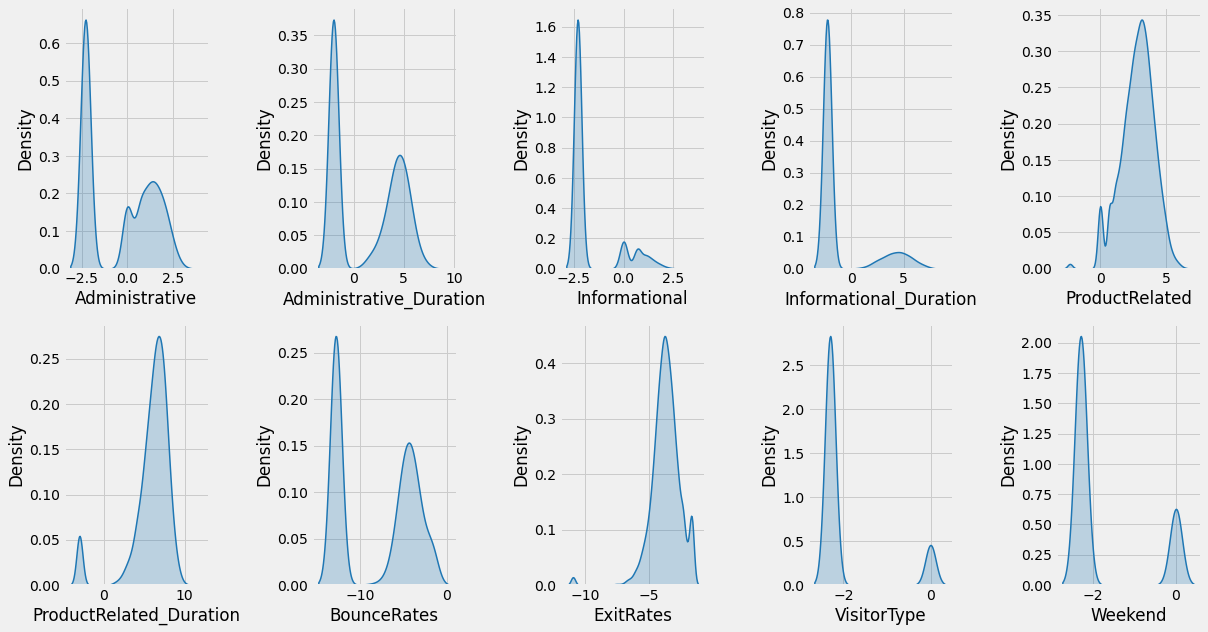

In [ ]:
# Checking Numerical Distribution After Log Transformation

plt.figure(figsize=(17,9))
for i in range(0, len(num[:-1])):
    plt.subplot(2, 5, i+1)
    sns.kdeplot(x=data_final[num[:-1][i]], linewidth=1.5, shade=True)
    plt.xlabel(num[:-1][i])
    plt.tight_layout()

In [ ]:
data_final[num[:-1]].describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12205.0,-0.435021,1.826928,-2.302585,-2.302585,0.000000,1.386294,3.295837
Administrative_Duration,12205.0,1.362818,3.318451,-2.014903,-2.014903,2.197225,4.550714,8.131163
Informational,12205.0,-1.666461,1.247389,-2.302585,-2.302585,-2.302585,-2.302585,3.178054
Informational_Duration,12205.0,-1.002383,2.696699,-2.302585,-2.302585,-2.302585,-2.302585,7.843604
ProductRelated,12205.0,2.789472,1.253319,-2.302585,2.079442,2.890372,3.637586,6.558198
ProductRelated_Duration,12205.0,5.863237,2.485210,-2.995732,5.262690,6.411724,7.297873,11.066225
BounceRates,12205.0,-8.072424,4.418257,-12.811209,-12.811209,-5.843544,-4.094345,-1.609438
ExitRates,12205.0,-3.696934,1.146572,-10.949927,-4.252334,-3.688879,-3.025585,-1.609438
VisitorType,12205.0,-1.983185,0.795915,-2.302585,-2.302585,-2.302585,-2.302585,0.000000
Weekend,12205.0,-1.763209,0.975249,-2.302585,-2.302585,-2.302585,-2.302585,0.000000


#### Handling Outlier

In [ ]:
# Display Statistic Value of Numerical Features Before Outlier Handling

data_final[num[:-2]].describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12205.0,-0.435021,1.826928,-2.302585,-2.302585,0.000000,1.386294,3.295837
Administrative_Duration,12205.0,1.362818,3.318451,-2.014903,-2.014903,2.197225,4.550714,8.131163
Informational,12205.0,-1.666461,1.247389,-2.302585,-2.302585,-2.302585,-2.302585,3.178054
Informational_Duration,12205.0,-1.002383,2.696699,-2.302585,-2.302585,-2.302585,-2.302585,7.843604
ProductRelated,12205.0,2.789472,1.253319,-2.302585,2.079442,2.890372,3.637586,6.558198
ProductRelated_Duration,12205.0,5.863237,2.485210,-2.995732,5.262690,6.411724,7.297873,11.066225
BounceRates,12205.0,-8.072424,4.418257,-12.811209,-12.811209,-5.843544,-4.094345,-1.609438
ExitRates,12205.0,-3.696934,1.146572,-10.949927,-4.252334,-3.688879,-3.025585,-1.609438
VisitorType,12205.0,-1.983185,0.795915,-2.302585,-2.302585,-2.302585,-2.302585,0.000000


In [ ]:
outlier_col = ['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration',
              'ProductRelated', 'ProductRelated_Duration']

In [ ]:
from scipy import stats
import numpy as np

# Handling Outlier using Z-score

print(f'Total Rows Before Outlier Handling = {len(data_final)}')

filtered_entries = np.array([True] * len(data_final))

for col in outlier_col:
    zscore = abs(stats.zscore(data_final[col]))
    filtered_entries = (zscore < 3) & filtered_entries 
    
data_final = data_final[filtered_entries] 

print(f'Total Rows Before Outlier Handling = {len(data_final)}')

Total Rows Before Outlier Handling = 12205
Total Rows Before Outlier Handling = 11495


In [ ]:
# Display Statistic Value of Numerical Features After Outlier Handling

data_final[num[:-2]].describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,11495.0,-0.354720,1.821086,-2.302585,-2.302585,0.000000,1.386294,3.295837
Administrative_Duration,11495.0,1.512919,3.307394,-2.014903,-2.014903,2.708050,4.594839,7.908571
Informational,11495.0,-1.658528,1.240827,-2.302585,-2.302585,-2.302585,-2.302585,1.945910
Informational_Duration,11495.0,-0.988427,2.682607,-2.302585,-2.302585,-2.302585,-2.302585,7.080447
ProductRelated,11495.0,2.926807,1.093803,0.000000,2.197225,2.995732,3.663562,6.530878
ProductRelated_Duration,11495.0,6.333082,1.410811,-0.693147,5.482131,6.499035,7.338566,10.203957
BounceRates,11495.0,-8.403674,4.281988,-12.811209,-12.811209,-6.291569,-4.317488,-1.696449
ExitRates,11495.0,-3.806141,1.073709,-10.949927,-4.316604,-3.726620,-3.167583,-1.648659
VisitorType,11495.0,-1.972070,0.807375,-2.302585,-2.302585,-2.302585,-2.302585,0.000000


#### Numerical Feature Scaling

In [ ]:
# Import Robust Scaler Library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

# Splitting Data Train - Test
X_train, X_test, y_train, y_test = train_test_split(data_final.drop('Purchase', axis=1),
                                                    data_final['Purchase'],
                                                    test_size=0.3,
                                                    random_state=78)

print(f'Total Train Data = {X_train.shape[0]}')
print(f'Total Test Data = {X_test.shape[0]}')

Total Train Data = 8046
Total Test Data = 3449


In [ ]:
# Declarate Scaler Function
# scaler = RobustScaler()
# scaler = StandardScaler()
scaler = MinMaxScaler()

# Fitting Scaler with Train Data
scaler.fit(X_train)

# Scaling Train and Test Data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create DataFrame from Scaled Array Values

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
# Display Statistic Value of Numerical X Train Features After Scaling

X_test_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Month_Aug,3449.0,0.033923,0.181057,0.00000,0.000000,0.000000,0.000000,1.000000
Month_Dec,3449.0,0.143810,0.350948,0.00000,0.000000,0.000000,0.000000,1.000000
Month_Feb,3449.0,0.010438,0.101646,0.00000,0.000000,0.000000,0.000000,1.000000
Month_Jul,3449.0,0.036822,0.188353,0.00000,0.000000,0.000000,0.000000,1.000000
Month_June,3449.0,0.019426,0.138037,0.00000,0.000000,0.000000,0.000000,1.000000
Month_Mar,3449.0,0.154827,0.361793,0.00000,0.000000,0.000000,0.000000,1.000000
Month_May,3449.0,0.273413,0.445775,0.00000,0.000000,0.000000,1.000000,1.000000
Month_Nov,3449.0,0.242099,0.428416,0.00000,0.000000,0.000000,0.000000,1.000000
Month_Oct,3449.0,0.048420,0.214683,0.00000,0.000000,0.000000,0.000000,1.000000
Month_Sep,3449.0,0.036822,0.188353,0.00000,0.000000,0.000000,0.000000,1.000000


#### Feature Selection

##### Lasso

In [ ]:
# we use copy data to train lasso
X_train_for_lasso = X_train_scaled.copy() 
X_test_for_lasso = X_test_scaled.copy()

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

# fit a Lasso and selet features, make sure to select l1 # kalo pake lasso setelah transformasi

sel_ = SelectFromModel(
    LogisticRegression(C=0.5,
                       penalty='l1',
                       solver='liblinear',
                       random_state=10))

sel_.fit(scaler.transform(X_train_for_lasso), y_train)

# remove features with zero coefficient from dataset
# and parse again as dataframe

X_train_lasso = pd.DataFrame(sel_.transform(X_train_for_lasso))
X_test_lasso = pd.DataFrame(sel_.transform(X_test_for_lasso))

# add the columns name
X_train_lasso.columns = X_train_for_lasso.columns[(sel_.get_support())]
X_test_lasso.columns = X_train_for_lasso.columns[(sel_.get_support())]

In [ ]:
X_train_lasso.shape, X_test_lasso.shape

((8046, 39), (3449, 39))

In [ ]:
# let's print the feature that will be removed by Lasso
X_train_for_lasso.columns[(~sel_.get_support())]

Index(['Month_June', 'OperatingSystems_Others', 'Browser_Chrome Desktop',
       'Browser_Chrome Mobile', 'Browser_Safari Mobile', 'Region_Jakarta',
       'Region_Luar Jabodetabek', 'Region_Tangerang',
       'TrafficType_Direct Visit', 'TrafficType_Google.com (Paid)',
       'Administrative_Duration', 'Informational_Duration'],
      dtype='object')

##### Remove quasi-constant features

In [ ]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(
    threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(X_train_scaled)  # fit finds the features with low variance

sum(sel.get_support()) # how many not quasi-constant?

47

In [ ]:
features_to_keep = X_train_scaled.columns[sel.get_support()]

In [ ]:
# # let's print the feature that will be removed by Quaasi Constant

quasi_constant = X_train_scaled.columns[~sel.get_support()]
quasi_constant

Index(['OperatingSystems_Others', 'Browser_Opera Desktop',
       'Browser_Opera Mobile', 'TrafficType_Linktr.ee'],
      dtype='object')

##### Chi-square

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2,k=51)
fit = selector.fit(X_train_scaled, y_train) # we use original X_train because X must be non-negative values
                                     # X_train_scaled containts negative values

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

In [ ]:
#concat two dataframes 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(51,'Score'))

                                    Features       Score
7                                  Month_Nov  137.446663
49                               VisitorType   73.052125
31                  TrafficType_Direct Visit   63.989909
41                            Administrative   62.791962
42                   Administrative_Duration   62.738507
43                             Informational   41.272629
44                    Informational_Duration   39.048356
6                                  Month_May   35.161323
32                TrafficType_Duckduckgo.com   34.229173
40                   TrafficType_youtube.com   33.448969
14                    OperatingSystems_Win10   33.004651
34          TrafficType_Google.com (Organic)   29.330220
5                                  Month_Mar   26.709283
39                TrafficType_i.facebook.com   19.529541
47                               BounceRates   18.894643
2                                  Month_Feb   17.591922
45                            P

In [ ]:
#concat two dataframes 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
features_keep_chi = featureScores.nlargest(20,'Score') # find top 20 feature
features_keep_chi

,Features,Score
7,Month_Nov,137.446663
49,VisitorType,73.052125
31,TrafficType_Direct Visit,63.989909
41,Administrative,62.791962
42,Administrative_Duration,62.738507
43,Informational,41.272629
44,Informational_Duration,39.048356
6,Month_May,35.161323
32,TrafficType_Duckduckgo.com,34.229173
40,TrafficType_youtube.com,33.448969


In [ ]:
chi_list = features_keep_chi['Features'].unique()
chi_list

array(['Month_Nov', 'VisitorType', 'TrafficType_Direct Visit',
       'Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'Month_May',
       'TrafficType_Duckduckgo.com', 'TrafficType_youtube.com',
       'OperatingSystems_Win10', 'TrafficType_Google.com (Organic)',
       'Month_Mar', 'TrafficType_i.facebook.com', 'BounceRates',
       'Month_Feb', 'ProductRelated',
       'OperatingSystems_Android 9 and Older Ver',
       'ProductRelated_Duration', 'Month_Oct'], dtype=object)

In [ ]:
dropped_by_chi = featureScores.nsmallest(31,'Score') # find bottom 31 (the rest features)
list_dropped_chi = dropped_by_chi['Features'].unique()
list_dropped_chi

array(['Browser_Chrome Mobile', 'TrafficType_Google.com (Paid)',
       'Month_Jul', 'OperatingSystems_Others', 'Region_Luar Jabodetabek',
       'Region_Tangerang', 'TrafficType_Others',
       'OperatingSystems_Android 11', 'Browser_Safari Mobile',
       'Region_Jakarta', 'Region_Bekasi', 'Browser_Others',
       'Browser_Chrome Desktop', 'Region_Depok',
       'OperatingSystems_Android 10', 'Browser_Opera Desktop',
       'Month_Sep', 'Browser_Samsung Internet', 'Month_Aug',
       'Region_Kota Tangerang Selatan', 'Region_Kota Bekasi',
       'Browser_Firefox Desktop', 'Weekend', 'Month_June',
       'TrafficType_I.instagram.com', 'TrafficType_Linktr.ee',
       'Browser_Microsoft Edge', 'Browser_Opera Mobile',
       'TrafficType_Facebook.com (Refering Site)', 'ExitRates',
       'Month_Dec'], dtype=object)

##### Univariate Feature Selection

In [ ]:
# Import libraries
from sklearn.feature_selection import f_classif, f_regression

# Calculate the univariate statistical measure between each of the variables and the target

# Similarly to chi2, the output is one array with f-scores and one array with the pvalues

univariate = f_classif(X_train_scaled, y_train)

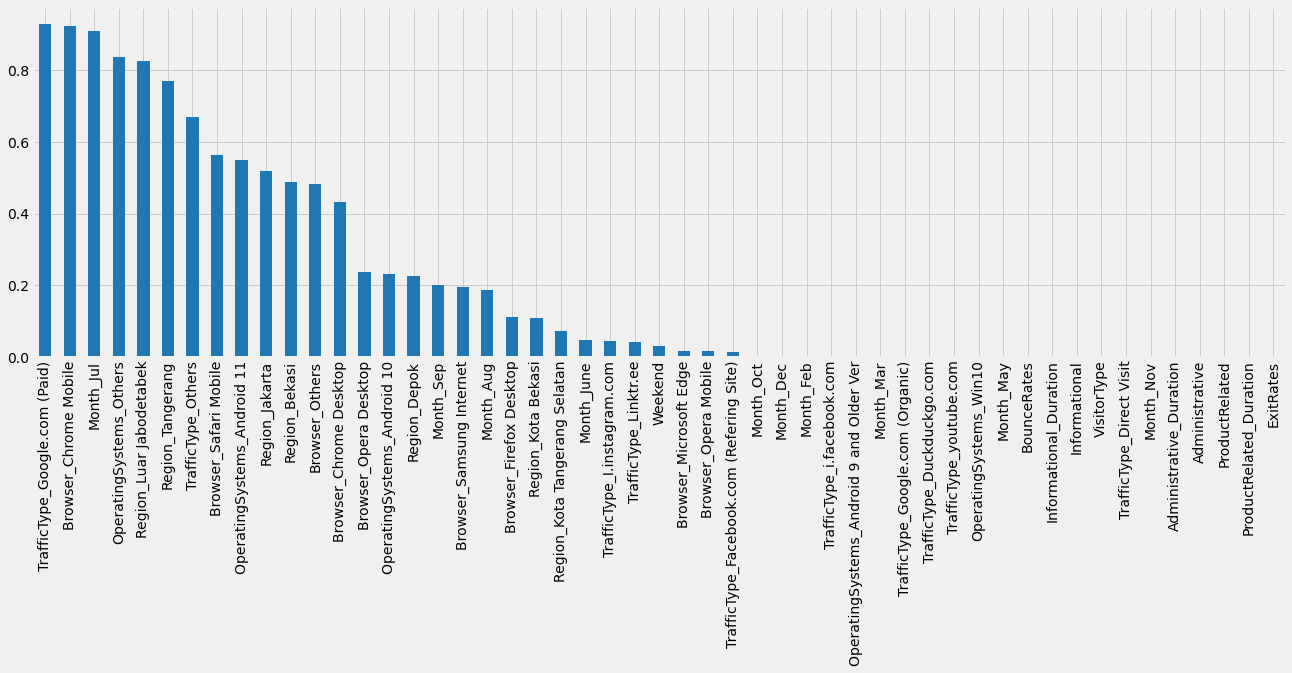

In [ ]:
# 1) let's capture the pvalues in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their anova pvalues
# 4) and make a var plot

univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 6))

- The smaller the p_value the more predictive the feature is.
- Features on the left of the plot are very bad at predicting the target. The most predictive features are on the right of the plot.

In [ ]:
univariate_drop = univariate.sort_values(ascending=False).head(31) # find bottom 31
univariate_drop = univariate_drop.index
univariate_drop

Index(['TrafficType_Google.com (Paid)', 'Browser_Chrome Mobile', 'Month_Jul',
       'OperatingSystems_Others', 'Region_Luar Jabodetabek',
       'Region_Tangerang', 'TrafficType_Others', 'Browser_Safari Mobile',
       'OperatingSystems_Android 11', 'Region_Jakarta', 'Region_Bekasi',
       'Browser_Others', 'Browser_Chrome Desktop', 'Browser_Opera Desktop',
       'OperatingSystems_Android 10', 'Region_Depok', 'Month_Sep',
       'Browser_Samsung Internet', 'Month_Aug', 'Browser_Firefox Desktop',
       'Region_Kota Bekasi', 'Region_Kota Tangerang Selatan', 'Month_June',
       'TrafficType_I.instagram.com', 'TrafficType_Linktr.ee', 'Weekend',
       'Browser_Microsoft Edge', 'Browser_Opera Mobile',
       'TrafficType_Facebook.com (Refering Site)', 'Month_Oct', 'Month_Dec'],
      dtype='object')

In [ ]:
univariate_kept = univariate.sort_values(ascending=False).tail(20) 
univariate_kept = univariate_kept.index
univariate_kept

Index(['Month_Feb', 'TrafficType_i.facebook.com',
       'OperatingSystems_Android 9 and Older Ver', 'Month_Mar',
       'TrafficType_Google.com (Organic)', 'TrafficType_Duckduckgo.com',
       'TrafficType_youtube.com', 'OperatingSystems_Win10', 'Month_May',
       'BounceRates', 'Informational_Duration', 'Informational', 'VisitorType',
       'TrafficType_Direct Visit', 'Month_Nov', 'Administrative_Duration',
       'Administrative', 'ProductRelated', 'ProductRelated_Duration',
       'ExitRates'],
      dtype='object')

##### Mutual information

In [ ]:
# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# calculate the mutual information between the variables and the target

# the smaller the value of the mi, the less information we can infer from
# the feature about the target

mi = mutual_info_classif(X_train_scaled, y_train)

Text(0, 0.5, 'Mutual Information')

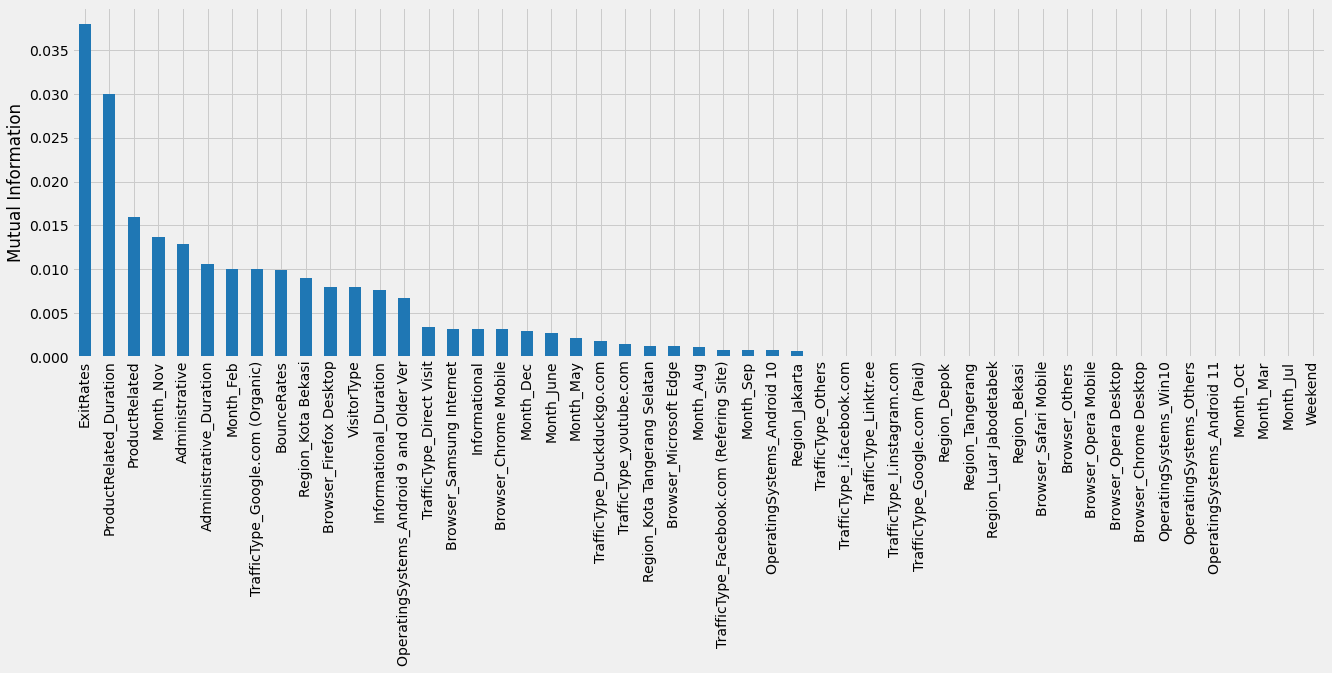

In [ ]:
# 1) let's capture the above array in a pandas series
# 2)add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a var plot

mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

There are a few features (left of the plot) with higher mutual information values. There are also features with almost zero MI values on the right of the plot. The higher mutual information value the more predictive value is

In [ ]:
mi_20 = mi.sort_values(ascending=False).head(20) # find top 20
mi_kept =  mi_20.index
mi_kept

Index(['ExitRates', 'ProductRelated_Duration', 'ProductRelated', 'Month_Nov',
       'Administrative', 'Administrative_Duration', 'Month_Feb',
       'TrafficType_Google.com (Organic)', 'BounceRates', 'Region_Kota Bekasi',
       'Browser_Firefox Desktop', 'VisitorType', 'Informational_Duration',
       'OperatingSystems_Android 9 and Older Ver', 'TrafficType_Direct Visit',
       'Browser_Samsung Internet', 'Informational', 'Browser_Chrome Mobile',
       'Month_Dec', 'Month_June'],
      dtype='object')

In [ ]:
mi_dropped = mi.sort_values(ascending=False).tail(31) # find bottom 31
mi_dropped = mi_dropped.index
mi_dropped

Index(['Month_May', 'TrafficType_Duckduckgo.com', 'TrafficType_youtube.com',
       'Region_Kota Tangerang Selatan', 'Browser_Microsoft Edge', 'Month_Aug',
       'TrafficType_Facebook.com (Refering Site)', 'Month_Sep',
       'OperatingSystems_Android 10', 'Region_Jakarta', 'TrafficType_Others',
       'TrafficType_i.facebook.com', 'TrafficType_Linktr.ee',
       'TrafficType_I.instagram.com', 'TrafficType_Google.com (Paid)',
       'Region_Depok', 'Region_Tangerang', 'Region_Luar Jabodetabek',
       'Region_Bekasi', 'Browser_Safari Mobile', 'Browser_Others',
       'Browser_Opera Mobile', 'Browser_Opera Desktop',
       'Browser_Chrome Desktop', 'OperatingSystems_Win10',
       'OperatingSystems_Others', 'OperatingSystems_Android 11', 'Month_Oct',
       'Month_Mar', 'Month_Jul', 'Weekend'],
      dtype='object')

##### Summary

In [ ]:
list_features_drop = ['Month_June', 'OperatingSystems_Android 10', 'Browser_Firefox Desktop', 'OperatingSystems_Win10',
                      'Region_Luar Jabodetabek', 'Browser_Safari Mobile','TrafficType_Others', 'Month_Oct', 
                      'Month_Dec', 'TrafficType_I.instagram.com', 'Month_Sep', 'TrafficType_Facebook.com (Refering Site)', 
                      'Region_Bekasi','TrafficType_Google.com (Paid)', 'OperatingSystems_Android 9 and Older Ver',
                      'Browser_Opera Mobile','Browser_Chrome Mobile','Region_Depok','Browser_Opera Desktop',
                      'Month_Aug','Month_Jul','Month_Mar','Region_Tangerang','OperatingSystems_Others',                   
                      'Region_Kota Tangerang Selatan','Region_Kota Bekasi','Region_Jakarta','Browser_Microsoft Edge',
                      'Browser_Others','TrafficType_Duckduckgo.com','Month_Feb','TrafficType_i.facebook.com',
                      'TrafficType_Linktr.ee','Browser_Chrome Desktop', 'Browser_Samsung Internet']

len(list_features_drop)

35

In [ ]:
# print data shape before dropping
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(8046, 51)
(3449, 51)
(8046,)
(3449,)


In [ ]:
# drop features
X_train_scaled = X_train_scaled.drop(list_features_drop, axis=1)
X_test_scaled = X_test_scaled.drop(list_features_drop, axis=1)

In [ ]:
# print data shape after dropping
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(8046, 16)
(3449, 16)
(8046,)
(3449,)


### Handling Imbalanced Target

In [ ]:
y_train.value_counts()

0    6739
1    1307
Name: Purchase, dtype: int64

In [ ]:
X_train_scaled.nunique()

Month_May                              2
Month_Nov                              2
OperatingSystems_Android 11            2
TrafficType_Direct Visit               2
TrafficType_Google.com (Organic)       2
TrafficType_youtube.com                2
Administrative                        26
Administrative_Duration             2477
Informational                          8
Informational_Duration               908
ProductRelated                       277
ProductRelated_Duration             6827
BounceRates                         1439
ExitRates                           3492
VisitorType                            2
Weekend                                2
dtype: int64

#### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Random Over Sampling
sm = SMOTE(random_state=0)
sm.fit(X_train_scaled, y_train)
X_smote, y_smote = sm.fit_resample(X_train_scaled, y_train)

In [ ]:
# Lets Check the Class Distribution
y_smote.value_counts()

0    6739
1    6739
Name: Purchase, dtype: int64

In [ ]:
X_train_scaled[num[:-1]].describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,8046.0,0.345722,0.326335,0.0,0.000000,0.411292,0.658914,1.0
Administrative_Duration,8046.0,0.352877,0.334036,0.0,0.000000,0.470414,0.666565,1.0
Informational,8046.0,0.149913,0.290878,0.0,0.000000,0.000000,0.000000,1.0
Informational_Duration,8046.0,0.139198,0.285984,0.0,0.000000,0.000000,0.000000,1.0
ProductRelated,8046.0,0.447303,0.168434,0.0,0.336436,0.450849,0.560960,1.0
ProductRelated_Duration,8046.0,0.624953,0.140018,0.0,0.539494,0.640753,0.724188,1.0
BounceRates,8046.0,0.395900,0.385406,0.0,0.000000,0.585337,0.764184,1.0
ExitRates,8046.0,0.768377,0.117125,0.0,0.714745,0.777585,0.837652,1.0
VisitorType,8046.0,0.141312,0.348365,0.0,0.000000,0.000000,0.000000,1.0
Weekend,8046.0,0.231046,0.421528,0.0,0.000000,0.000000,0.000000,1.0


In [ ]:
X_smote[num[:-1]].describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,13478.0,0.396124,0.318952,0.0,0.000000,0.515923,0.668049,1.0
Administrative_Duration,13478.0,0.404540,0.325885,0.0,0.000000,0.559774,0.682807,1.0
Informational,13478.0,0.172381,0.304217,0.0,0.000000,0.000000,0.255701,1.0
Informational_Duration,13478.0,0.162100,0.301559,0.0,0.000000,0.000000,0.000000,1.0
ProductRelated,13478.0,0.475664,0.161134,0.0,0.372304,0.480103,0.581142,1.0
ProductRelated_Duration,13478.0,0.651266,0.129650,0.0,0.580904,0.665974,0.737784,1.0
BounceRates,13478.0,0.367191,0.371479,0.0,0.000000,0.301331,0.732482,1.0
ExitRates,13478.0,0.747036,0.116490,0.0,0.699058,0.756661,0.811581,1.0
VisitorType,13478.0,0.171560,0.376099,0.0,0.000000,0.000000,0.000000,1.0
Weekend,13478.0,0.240435,0.426169,0.0,0.000000,0.000000,0.000000,1.0


### Modeling

In [ ]:
# Import Metrics Evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix, classification_report, roc_auc_score, make_scorer

# Import Models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [ ]:
# Create Modeling Function

def createmodel(x_train, x_test, y_train, y_test, models):
  performance = []
  for i in models:
    model = i
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_train_pred = model.predict(x_train)
    performance.append([np.round(precision_score(y_train, y_train_pred, pos_label=0),3), np.round(precision_score(y_test, y_pred, pos_label=0),3),
                       np.round(recall_score(y_train, y_train_pred, pos_label=0),3), np.round(recall_score(y_test, y_pred, pos_label=0),3),
                        np.round(fbeta_score(y_train, y_train_pred, pos_label=0, beta=2),3), np.round(fbeta_score(y_test, y_pred, pos_label=0, beta=2),3)])
  performance_df = pd.DataFrame(data=performance, columns='Train\nPrecision,Test\nPrecision,Train\nRecall,Test\nRecall,Train\nF2 Score,Test\nF2 Score'.split(","),
                                index=str(models).replace('[',"").replace(']',"").replace('random_state=42',"").split(','))
  plt.figure(figsize=(14, 10))
  sns.heatmap(performance_df, annot=True, cmap="Blues", annot_kws={"fontsize":14})
  plt.tick_params(axis='both', which='major', labelsize=14, labelbottom = False, bottom=False, top = False, labeltop=True)
  plt.tight_layout()
  plt.savefig('modelling.png')
  plt.show()

In [ ]:
# Define Classification Algorithms

models = [LogisticRegression(random_state=42), KNeighborsClassifier(), GaussianNB(), SVC(random_state=42), DecisionTreeClassifier(random_state=42),
          RandomForestClassifier(random_state=42), AdaBoostClassifier(random_state=42), GradientBoostingClassifier(random_state=42), LGBMClassifier(random_state=42),
          XGBClassifier(random_state=42)]

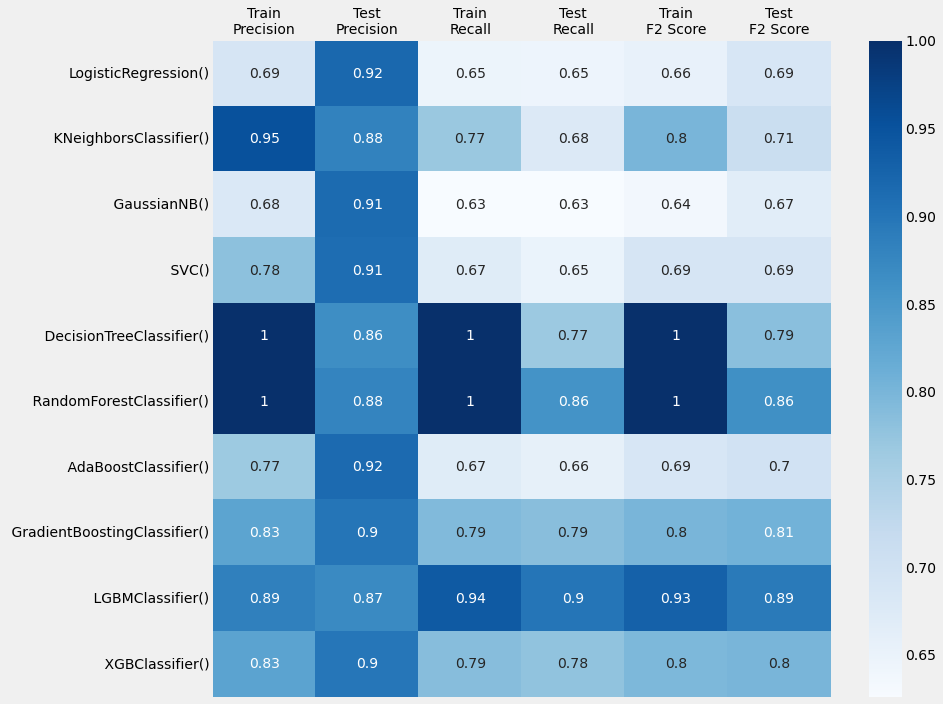

In [ ]:
# Modeling

createmodel(X_smote,X_test_scaled,y_smote,y_test, models)

Based on the Experiment above, we have various Test F2 Score. We decide to do Hyperparameter Tuning with the Top 2 F2 Score Algorithms, there are `LGBM Classifier` and `Random Forest Classifier`.

#### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

###### LGBM Classifier

In [ ]:
params = {'learning_rate': np.arange(0.05,0.2,0.05),
          'n_estimators': np.arange(50, 150, 10),
          'random_state' : [42]}

In [ ]:
f2_scorer = make_scorer(fbeta_score, pos_label=0, beta=2)
g = GridSearchCV(LGBMClassifier(), params, cv=5, scoring=f2_scorer)
g.fit(X_smote,y_smote)

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': array([0.05, 0.1 , 0.15, 0.2 ]),
                         'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140]),
                         'random_state': [42]},
             scoring=make_scorer(fbeta_score, pos_label=0, beta=2))

In [ ]:
print(g.best_params_)

{'learning_rate': 0.15000000000000002, 'n_estimators': 140, 'random_state': 42}


In [ ]:
best_params = g.best_params_
lgbm = LGBMClassifier(**best_params)
lgbm.fit(X_smote,y_smote)

LGBMClassifier(learning_rate=0.15000000000000002, n_estimators=140,
               random_state=42)

In [ ]:
y_train_pred = lgbm.predict(X_smote)
y_test_pred = lgbm.predict(X_test_scaled)

print('TRAINING RESULT:')
print('======================================================')
print('F2 Score:', np.round(fbeta_score(y_smote, y_train_pred, pos_label=0, beta=2),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_smote, y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_smote, y_train_pred))

print('\n======================================================')

print('\nTESTING RESULT:')
print('======================================================')
print('F2 Score:', np.round(fbeta_score(y_test, y_test_pred, pos_label=0, beta=2),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred))

TRAINING RESULT:
F2 Score: 0.964
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6739
           1       0.97      0.93      0.95      6739

    accuracy                           0.95     13478
   macro avg       0.95      0.95      0.95     13478
weighted avg       0.95      0.95      0.95     13478

Confussion Matrix ------------------------------------
[[6555  184]
 [ 490 6249]]


TESTING RESULT:
F2 Score: 0.901
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      2882
           1       0.38      0.27      0.32       567

    accuracy                           0.81      3449
   macro avg       0.62      0.59      0.60      3449
weighted avg       0.78      0.81      0.79      3449

Confussion Matrix ------------------------------------
[[2625  257]
 [ 412  155]]


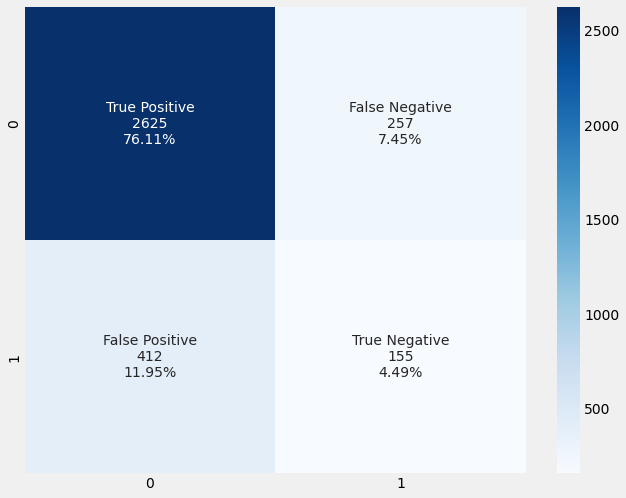

In [ ]:
y_pred = lgbm.predict(X_test_scaled)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Positive", "False Negative", "False Positive", "True Negative"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10, 8))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

##### Random Forest Classifier

In [ ]:
params = {'criterion': ['gini', 'entropy', 'log_loss'],
          'max_depth': np.arange(10,50,10),
          'max_features' : ['sqrt', 'log2', None],
          'random_state' : [42]}

In [ ]:
f2_scorer = make_scorer(fbeta_score, pos_label=0, beta=2)
g = GridSearchCV(RandomForestClassifier(), params, cv=5, scoring=f2_scorer)
g.fit(X_smote,y_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([10, 20, 30, 40]),
                         'max_features': ['sqrt', 'log2', None],
                         'random_state': [42]},
             scoring=make_scorer(fbeta_score, pos_label=0, beta=2))

In [ ]:
print(g.best_params_)

{'criterion': 'gini', 'max_depth': 40, 'max_features': 'sqrt', 'random_state': 42}


In [ ]:
best_params = g.best_params_
rf = RandomForestClassifier(**best_params)
rf.fit(X_smote,y_smote)

RandomForestClassifier(max_depth=40, max_features='sqrt', random_state=42)

In [ ]:
y_train_pred = rf.predict(X_smote)
y_test_pred = rf.predict(X_test_scaled)

print('TRAINING RESULT:')
print('======================================================')
print('F2 Score:', np.round(fbeta_score(y_smote, y_train_pred, pos_label=0, beta=2),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_smote, y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_smote, y_train_pred))

print('\n======================================================')

print('\nTESTING RESULT:')
print('======================================================')
print('F2 Score:', np.round(fbeta_score(y_test, y_test_pred, pos_label=0, beta=2),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred))

TRAINING RESULT:
F2 Score: 1.0
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6739
           1       1.00      1.00      1.00      6739

    accuracy                           1.00     13478
   macro avg       1.00      1.00      1.00     13478
weighted avg       1.00      1.00      1.00     13478

Confussion Matrix ------------------------------------
[[6739    0]
 [   0 6739]]


TESTING RESULT:
F2 Score: 0.862
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2882
           1       0.36      0.40      0.38       567

    accuracy                           0.78      3449
   macro avg       0.62      0.63      0.62      3449
weighted avg       0.79      0.78      0.79      3449

Confussion Matrix ------------------------------------
[[2472  410]
 [ 340  227]]


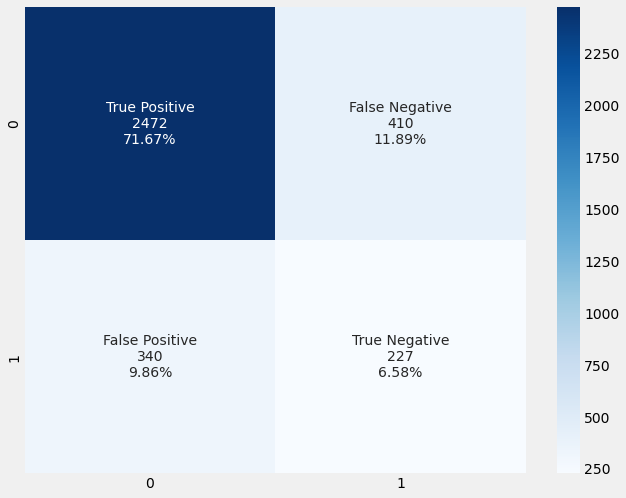

In [ ]:
y_pred = rf.predict(X_test_scaled)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Positive", "False Negative", "False Positive", "True Negative"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10, 8))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Based on the Hyperparameter Tuning above, `LGBM Classifier` has the highest F2 Score. So, we decide to Interprate this Model and extract its Features Importance with SHAP.

#### Model Interpretation with SHAP Value

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.0 MB/s 


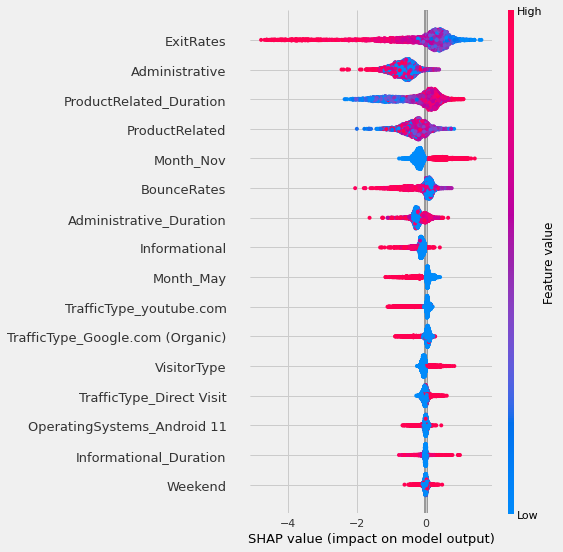

In [ ]:
import shap
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values[1], X_test_scaled)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0:1], X_test_scaled.iloc[0,:])

Based on the SHAP Features Importance result, we try to model LGBM Classifier with only 4 features with the highest importance value.

### Modeling After Features Importance

In [ ]:
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_smote[['ExitRates', 'Administrative', 'ProductRelated_Duration', 'ProductRelated']],y_smote)

LGBMClassifier(random_state=42)

In [ ]:
y_train_pred = lgbm.predict(X_smote[['ExitRates', 'Administrative', 'ProductRelated_Duration', 'ProductRelated']])
y_test_pred = lgbm.predict(X_test_scaled[['ExitRates', 'Administrative', 'ProductRelated_Duration', 'ProductRelated']])

print('TRAINING RESULT:')
print('======================================================')
print('F2 Score:', np.round(fbeta_score(y_smote, y_train_pred, pos_label=0, beta=2),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_smote, y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_smote, y_train_pred))

print('\n======================================================')

print('\nTESTING RESULT:')
print('======================================================')
print('F2 Score:', np.round(fbeta_score(y_test, y_test_pred, pos_label=0, beta=2),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred))

TRAINING RESULT:
F2 Score: 0.927
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6739
           1       0.94      0.82      0.88      6739

    accuracy                           0.89     13478
   macro avg       0.89      0.89      0.89     13478
weighted avg       0.89      0.89      0.89     13478

Confussion Matrix ------------------------------------
[[6412  327]
 [1199 5540]]


TESTING RESULT:
F2 Score: 0.897
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      2882
           1       0.33      0.23      0.27       567

    accuracy                           0.80      3449
   macro avg       0.59      0.57      0.57      3449
weighted avg       0.77      0.80      0.78      3449

Confussion Matrix ------------------------------------
[[2618  264]
 [ 439  128]]


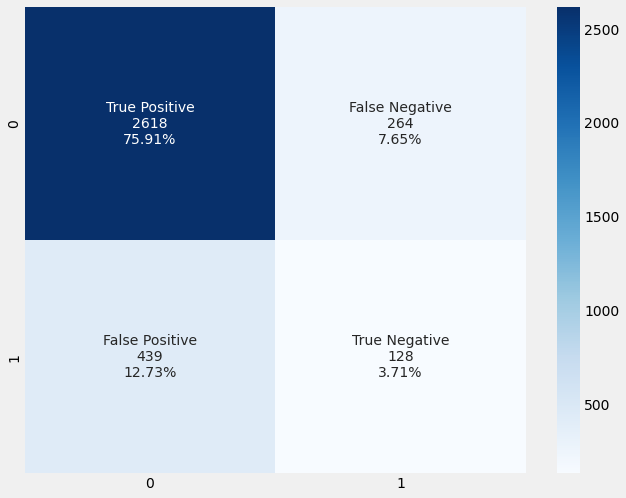

In [ ]:
y_pred = lgbm.predict(X_test_scaled[['ExitRates', 'Administrative', 'ProductRelated_Duration', 'ProductRelated']])
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Positive", "False Negative", "False Positive", "True Negative"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10, 8))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

#### Hyperparameter Tuning

In [ ]:
params = {'learning_rate': np.arange(0.05,0.2,0.05),
          'n_estimators': np.arange(50, 150, 10),
          'random_state' : [42]}

In [ ]:
f2_scorer = make_scorer(fbeta_score, pos_label=0, beta=2)
g = GridSearchCV(LGBMClassifier(), params, cv=5, scoring=f2_scorer)
g.fit(X_smote[['ExitRates', 'Administrative', 'ProductRelated_Duration', 'ProductRelated']],y_smote)

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': array([0.05, 0.1 , 0.15, 0.2 ]),
                         'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140]),
                         'random_state': [42]},
             scoring=make_scorer(fbeta_score, pos_label=0, beta=2))

In [ ]:
print(g.best_params_)

{'learning_rate': 0.1, 'n_estimators': 140, 'random_state': 42}


In [ ]:
best_params = g.best_params_
lgbm = LGBMClassifier(**best_params)
lgbm.fit(X_smote[['ExitRates', 'Administrative', 'ProductRelated_Duration', 'ProductRelated']],y_smote)

LGBMClassifier(n_estimators=140, random_state=42)

In [ ]:
y_train_pred = lgbm.predict(X_smote[['ExitRates', 'Administrative', 'ProductRelated_Duration', 'ProductRelated']])
y_test_pred = lgbm.predict(X_test_scaled[['ExitRates', 'Administrative', 'ProductRelated_Duration', 'ProductRelated']])

print('TRAINING RESULT:')
print('======================================================')
print('F2 Score:', np.round(fbeta_score(y_smote, y_train_pred, pos_label=0, beta=2),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_smote, y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_smote, y_train_pred))

print('\n======================================================')

print('\nTESTING RESULT:')
print('======================================================')
print('F2 Score:', np.round(fbeta_score(y_test, y_test_pred, pos_label=0, beta=2),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred))

TRAINING RESULT:
F2 Score: 0.943
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      6739
           1       0.96      0.84      0.90      6739

    accuracy                           0.90     13478
   macro avg       0.91      0.90      0.90     13478
weighted avg       0.91      0.90      0.90     13478

Confussion Matrix ------------------------------------
[[6520  219]
 [1097 5642]]


TESTING RESULT:
F2 Score: 0.906
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      2882
           1       0.32      0.19      0.24       567

    accuracy                           0.80      3449
   macro avg       0.59      0.56      0.56      3449
weighted avg       0.76      0.80      0.78      3449

Confussion Matrix ------------------------------------
[[2652  230]
 [ 459  108]]


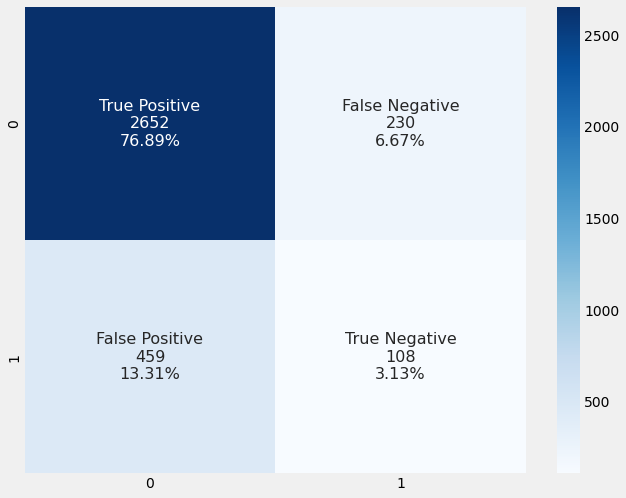

In [ ]:
y_pred = lgbm.predict(X_test_scaled[['ExitRates', 'Administrative', 'ProductRelated_Duration', 'ProductRelated']])
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Positive", "False Negative", "False Positive", "True Negative"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10, 8))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', annot_kws={"fontsize":16})
plt.savefig('cm', dpi=500)

Based on the Experiment above, LGBM Classifier with Hyperparameter Tuning still has a high F2 Score and less overfit than before (use all features). So we decide to use this model as a Final Model.

### Business Recommendation Impact Simulation

In [ ]:
simulation_features = ['ExitRates', 'Administrative', 'ProductRelated_Duration', 'ProductRelated']

In [ ]:
# Create Simulation Function

def simulation(feature):
  # Define TP FN FP TN var
  tp, fn, fp, tn = cf_matrix.flatten()

  # Create Simulation Data
  df_purchase = df[df.Purchase == 1][simulation_features]
  df_not_purchase = df[df.Purchase == 0][simulation_features]
  
  cr_list = []
  
  # Create Improvement Experiments
  experiments = np.arange(-1,1.05,0.05)
  experiments[20] = 0
  for i in experiments:
    df_simulation = pd.concat([df_purchase.sample(int(np.ceil(0.1*df_purchase.shape[0])), random_state=42), df_not_purchase.sample(int(np.ceil(0.1*df_not_purchase.shape[0])), random_state=42)]).reset_index(drop=True)
    df_simulation[feature] = df_simulation[feature]*(1+i)
    
    # Replace 0 Value to Small Value
    for i in simulation_features:
      df_simulation[i].replace(0, (df_simulation[df_simulation[i] > 0][i].min())/10, inplace = True)
    
    # Log Transform
    for i in simulation_features:
      df_simulation[i] = np.log(df_simulation[i])
    
    # Feature Scaling
    temp = X_test.reset_index(drop=True)[:1221].copy()
    temp[simulation_features] = df_simulation
    df_simulation = scaler.transform(temp)
    df_simulation = pd.DataFrame(df_simulation, columns=X_test.columns)
    df_simulation = df_simulation[simulation_features]
    
    # Predict Simulation Values
    simulation_pred = lgbm.predict(df_simulation)

    # Adjust Predicted Value to Actual Value
    simulation_pred_pos = simulation_pred[simulation_pred==0]
    simulation_pred_pos[:(int(np.ceil((fp/(fp+tp))*(simulation_pred[simulation_pred==0].size))))] = 1
    simulation_pred_pos
    simulation_pred_neg = simulation_pred[simulation_pred==1]
    simulation_pred_neg[:(int(np.ceil((fn/(fn+tn))*(simulation_pred[simulation_pred==1].size))))] = 0
    simulation_pred_neg
    simulation_pred = np.concatenate((simulation_pred_neg, simulation_pred_pos))
    
    # Calculate Simulation Conversion Rate
    cr = simulation_pred[simulation_pred==1].size/simulation_pred.size
    cr_list.append(cr)
    
  # Create CR Plot
  print(cr_list)
  plt.plot(experiments, cr_list, marker='o', linewidth=1)
  plt.ylabel('Conversion Rate')
  plt.xlabel(str(feature) + ' Increased')
  plt.title('Conversion Rate Increased by ' + str(feature))
  plt.axvline(linewidth=1, color='r', label = 'Current Condition')
  plt.legend()
  plt.show()

#### 1. Discount Offering to Non-Purchase Predicted Visitors

In [ ]:
# Assumption
cogs = 100000
purchase_revenue = 1.65 * cogs #65% Gross Profit Margin
treatment_cost = 0.1 * purchase_revenue #Diskon 10%
treatment_eff_rate = 0.1 #Shifting Visitors Intention from Not Purchase to Purchase Effectivity
visitor = 100000

# Current Condition
current_cr = df.Purchase.value_counts()[1]/df.Purchase.shape[0]
current_revenue = current_cr * (purchase_revenue - cogs) * visitor

print(f'Current Conversion Rate = {current_cr *100:.2f}%')
print(f'Current Revenue = Rp{current_revenue:.0f}\n')

# Simulation Condition
tp, fn, fp, tn = cf_matrix.flatten()/np.sum(cf_matrix)
simulation_cr = current_cr + (treatment_eff_rate * tp)
simulation_revenue_bc = simulation_cr * (purchase_revenue - cogs) * visitor
simulation_cost = ((treatment_eff_rate * tp) + fp) * treatment_cost * visitor
simulation_revenue = simulation_revenue_bc - simulation_cost

print(f'Predictive Modeling Simulation Conversion Rate = {simulation_cr *100:.2f}%')
print(f'Predictive Modeling Simulation Gross Profit = Rp{simulation_revenue:.0f}')

Current Conversion Rate = 15.63%
Current Revenue = Rp1016140926

Predictive Modeling Simulation Conversion Rate = 23.32%
Predictive Modeling Simulation Gross Profit = Rp1169481024


*Assumption Explanation* <br>

*On the face of it, a gross profit margin ratio of 50 to 70% would be considered healthy, and it would be for many types of businesses, like retailers, restaurants, manufacturers and other producers of goods. (source : [here](https://www.bdc.ca/en/articles-tools/entrepreneur-toolkit/templates-business-guides/glossary/gross-profit-margin-ratio#:~:text=What%20is%20a%20good%20gross,and%20other%20producers%20of%20goods.))*



#### 2. Improve Visitors' Exit Rates

[0.23832923832923833, 0.20147420147420148, 0.18837018837018837, 0.1850941850941851, 0.18591318591318592, 0.1850941850941851, 0.18345618345618345, 0.18181818181818182, 0.17936117936117937, 0.1769041769041769, 0.17526617526617527, 0.17362817362817362, 0.17280917280917282, 0.17117117117117117, 0.16953316953316952, 0.17035217035217035, 0.16871416871416872, 0.16953316953316952, 0.16625716625716624, 0.16461916461916462, 0.1638001638001638, 0.1638001638001638, 0.16298116298116297, 0.16216216216216217, 0.16216216216216217, 0.16052416052416052, 0.1597051597051597, 0.15806715806715807, 0.15806715806715807, 0.15724815724815724, 0.15724815724815724, 0.15724815724815724, 0.15642915642915642, 0.15561015561015562, 0.15561015561015562, 0.1547911547911548, 0.15561015561015562, 0.15561015561015562, 0.1547911547911548, 0.1547911547911548, 0.1547911547911548]


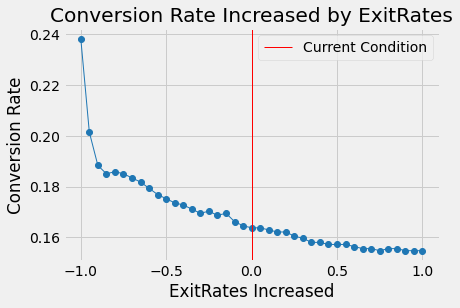

In [ ]:
simulation('ExitRates')

We will choose the point of improvement to decrease 15% `Exit Rate` value.

#### 3. Improve Visitors' Administrative Pages

[0.17035217035217035, 0.22686322686322685, 0.23832923832923833, 0.24078624078624078, 0.23177723177723178, 0.22768222768222768, 0.23832923832923833, 0.23914823914823916, 0.23095823095823095, 0.23996723996723995, 0.20393120393120392, 0.23832923832923833, 0.2285012285012285, 0.23669123669123668, 0.23505323505323505, 0.2244062244062244, 0.2285012285012285, 0.23587223587223588, 0.2334152334152334, 0.23505323505323505, 0.1638001638001638, 0.29074529074529076, 0.2891072891072891, 0.28992628992628994, 0.28255528255528256, 0.276003276003276, 0.28746928746928746, 0.28665028665028663, 0.2809172809172809, 0.28501228501228504, 0.25634725634725636, 0.2833742833742834, 0.27682227682227684, 0.2809172809172809, 0.27764127764127766, 0.2678132678132678, 0.2719082719082719, 0.276003276003276, 0.2751842751842752, 0.27436527436527436, 0.22276822276822278]


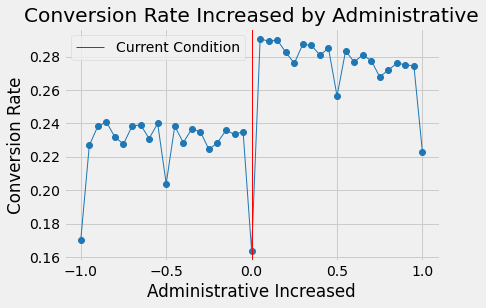

In [ ]:
simulation('Administrative')

We will choose the point of improvement to increase 5% `Administrative Page` value.

#### 4. Improve Visitors' Product Related Duration

[0.14742014742014742, 0.14742014742014742, 0.14742014742014742, 0.14742014742014742, 0.14823914823914824, 0.14823914823914824, 0.14905814905814907, 0.1506961506961507, 0.14987714987714987, 0.1506961506961507, 0.15233415233415235, 0.1547911547911548, 0.15642915642915642, 0.15724815724815724, 0.1588861588861589, 0.1588861588861589, 0.1597051597051597, 0.16052416052416052, 0.16216216216216217, 0.16298116298116297, 0.1638001638001638, 0.16461916461916462, 0.16461916461916462, 0.16461916461916462, 0.16625716625716624, 0.16707616707616707, 0.16707616707616707, 0.1678951678951679, 0.1678951678951679, 0.1678951678951679, 0.1678951678951679, 0.1678951678951679, 0.16871416871416872, 0.16871416871416872, 0.16953316953316952, 0.16871416871416872, 0.16953316953316952, 0.17035217035217035, 0.16871416871416872, 0.16871416871416872, 0.1678951678951679]


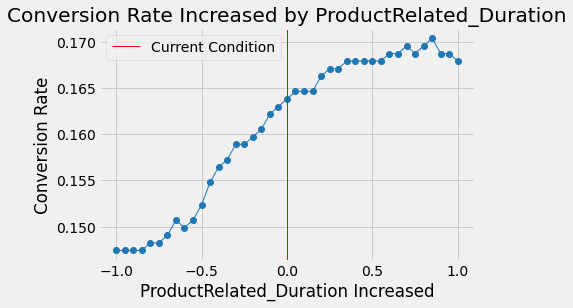

In [ ]:
simulation('ProductRelated_Duration')

We will choose the point of improvement to increase 5% `Product Related Duration` value.

#### 5. Improve Visitors' Product Related Pages

[0.14823914823914824, 0.1588861588861589, 0.18181818181818182, 0.20065520065520065, 0.20556920556920558, 0.20884520884520885, 0.22276822276822278, 0.2334152334152334, 0.2244062244062244, 0.23832923832923833, 0.20475020475020475, 0.2416052416052416, 0.22358722358722358, 0.24406224406224405, 0.23505323505323505, 0.22113022113022113, 0.22276822276822278, 0.22932022932022933, 0.23095823095823095, 0.22604422604422605, 0.1638001638001638, 0.22604422604422605, 0.21621621621621623, 0.21375921375921375, 0.20638820638820637, 0.2031122031122031, 0.20802620802620803, 0.20638820638820637, 0.19737919737919737, 0.19901719901719903, 0.18181818181818182, 0.19574119574119575, 0.1891891891891892, 0.19328419328419327, 0.19164619164619165, 0.1850941850941851, 0.18427518427518427, 0.18427518427518427, 0.18427518427518427, 0.18427518427518427, 0.1588861588861589]


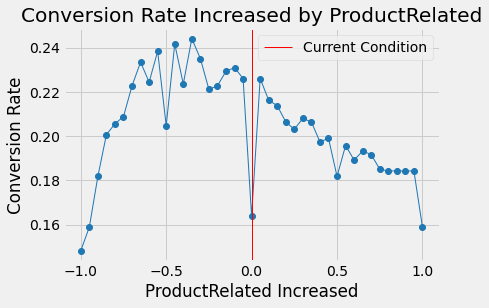

In [ ]:
simulation('ProductRelated')

We will choose the point of improvement to decrease 10% `Product Related` value.

#### 6. Combine All of Recommendations

In [ ]:
# Define TP FN FP TN var
tp, fn, fp, tn = cf_matrix.flatten()

# Create Simulation Data
df_purchase = df[df.Purchase == 1][simulation_features]
df_not_purchase = df[df.Purchase == 0][simulation_features]

# Create Improvement Experiments
df_simulation = pd.concat([df_purchase.sample(int(np.ceil(0.1*df_purchase.shape[0])), random_state=42), df_not_purchase.sample(int(np.ceil(0.1*df_not_purchase.shape[0])), random_state=42)]).reset_index(drop=True)
df_simulation['ExitRates'] = df_simulation['ExitRates']*0.85
df_simulation['Administrative'] = df_simulation['Administrative']*1.05
df_simulation['ProductRelated_Duration'] = df_simulation['ProductRelated_Duration']*1.05
df_simulation['ExitRates'] = df_simulation['ExitRates']*0.9

# Replace 0 Value to Small Value
for i in simulation_features:
  df_simulation[i].replace(0, (df_simulation[df_simulation[i] > 0][i].min())/10, inplace = True)

# Log Transform
for i in simulation_features:
  df_simulation[i] = np.log(df_simulation[i])

# Feature Scaling
temp = X_test.reset_index(drop=True)[:1221].copy()
temp[simulation_features] = df_simulation
df_simulation = scaler.transform(temp)
df_simulation = pd.DataFrame(df_simulation, columns=X_test.columns)
df_simulation = df_simulation[simulation_features]

# Predict Simulation Values
simulation_pred = lgbm.predict(df_simulation)

# Adjust Predicted Value to Actual Value
simulation_pred_pos = simulation_pred[simulation_pred==0]
simulation_pred_pos[:(int(np.ceil((fp/(fp+tp))*(simulation_pred[simulation_pred==0].size))))] = 1
simulation_pred_pos
simulation_pred_neg = simulation_pred[simulation_pred==1]
simulation_pred_neg[:(int(np.ceil((fn/(fn+tn))*(simulation_pred[simulation_pred==1].size))))] = 0
simulation_pred_neg
simulation_pred = np.concatenate((simulation_pred_neg, simulation_pred_pos))

# Calculate Simulation Conversion Rate
new_cr = simulation_pred[simulation_pred==1].size/simulation_pred.size
# print(f'Conversion Rate After All Features Improvement = {new_cr *100:.2f}%')

# Simulation Modeling Implementation

## Assumption
cogs = 100000
purchase_revenue = 1.65 * cogs #65% Gross Profit Margin
treatment_cost = 0.1 * purchase_revenue #Diskon 10%
treatment_eff_rate = 0.1 #Shifting Visitors Intention from Not Purchase to Purchase Effectivity
visitor = 100000
tp, fn, fp, tn = cf_matrix.flatten()/visitor

simulation_cr = new_cr + (treatment_eff_rate * tp)
simulation_revenue_bc = simulation_cr * (purchase_revenue - cogs) * visitor
simulation_cost = ((treatment_eff_rate * tp) + fp) * treatment_cost * visitor
simulation_revenue = simulation_revenue_bc - simulation_cost

print(f'Simulation Conversion Rate After All Recommendation = {simulation_cr *100:.2f}%')
print(f'Simulation Gross Profit After All Recommendation = Rp{simulation_revenue:.0f}')

Simulation Conversion Rate After All Recommendation = 30.40%
Simulation Gross Profit After All Recommendation = Rp1964338659
